# A FMCG company has entered into the instant noodles business two years back. Higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country. 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# Importing data

In [3]:
df = pd.read_csv("Data.csv")
df.head().T

0              1              2  \
Ware_house_ID                 WH_100000      WH_100001      WH_100002   
WH_Manager_ID                 EID_50000      EID_50001      EID_50002   
Location_type                     Urban          Rural          Rural   
WH_capacity_size                  Small          Large            Mid   
zone                               West          North          South   
WH_regional_zone                 Zone 6         Zone 5         Zone 2   
num_refill_req_l3m                    3              0              1   
transport_issue_l1y                   1              0              0   
Competitor_in_mkt                     2              4              4   
retail_shop_num                    4651           6217           4306   
wh_owner_type                    Rented  Company Owned  Company Owned   
distributor_num                      24             47             64   
flood_impacted                        0              0              0   
flood_proof                           1              0              0   
electric_supply                       1              1              0   
dist_from_hub                        91            210            161   
workers_num                        29.0           31.0           37.0   
wh_est_year                         NaN            NaN            NaN   
storage_issue_reported_l3m           13              4             17   
temp_reg_mach                         0              0              0   
approved_wh_govt_certificate          A              A              A   
wh_breakdown_l3m                      5              3              6   
govt_check_l3m                       15             17             22   
product_wg_ton                    17115           5074          23137   

                                      3              4  
Ware_house_ID                 WH_100003      WH_100004  
WH_Manager_ID                 EID_50003      EID_50004  
Location_type                     Rural          Rural  
WH_capacity_size                    Mid          Large  
zone                              North          North  
WH_regional_zone                 Zone 3         Zone 5  
num_refill_req_l3m                    7              3  
transport_issue_l1y                   4              1  
Competitor_in_mkt                     2              2  
retail_shop_num                    6000           4740  
wh_owner_type                    Rented  Company Owned  
distributor_num                      50             42  
flood_impacted                        0              1  
flood_proof                           0              0  
electric_supply                       0              1  
dist_from_hub                       103            112  
workers_num                        21.0           25.0  
wh_est_year                         NaN         2009.0  
storage_issue_reported_l3m           17             18  
temp_reg_mach                         1              0  
approved_wh_govt_certificate         A+              C  
wh_breakdown_l3m                      3              6  
govt_check_l3m                       27             24  
product_wg_ton                    22115          24071

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [6]:
df.shape

(25000, 24)

In [7]:
df.dtypes.value_counts()

int64      14
object      8
float64     2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [9]:
df.describe().T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

In [10]:
df.describe(include="all").T

count unique            top   freq  \
Ware_house_ID                   25000  25000      WH_100000      1   
WH_Manager_ID                   25000  25000      EID_50000      1   
Location_type                   25000      2          Rural  22957   
WH_capacity_size                25000      3          Large  10169   
zone                            25000      4          North  10278   
WH_regional_zone                25000      6         Zone 6   8339   
num_refill_req_l3m            25000.0    NaN            NaN    NaN   
transport_issue_l1y           25000.0    NaN            NaN    NaN   
Competitor_in_mkt             25000.0    NaN            NaN    NaN   
retail_shop_num               25000.0    NaN            NaN    NaN   
wh_owner_type                   25000      2  Company Owned  13578   
distributor_num               25000.0    NaN            NaN    NaN   
flood_impacted                25000.0    NaN            NaN    NaN   
flood_proof                   25000.0    NaN            NaN    NaN   
electric_supply               25000.0    NaN            NaN    NaN   
dist_from_hub                 25000.0    NaN            NaN    NaN   
workers_num                   24010.0    NaN            NaN    NaN   
wh_est_year                   13119.0    NaN            NaN    NaN   
storage_issue_reported_l3m    25000.0    NaN            NaN    NaN   
temp_reg_mach                 25000.0    NaN            NaN    NaN   
approved_wh_govt_certificate    24092      5              C   5501   
wh_breakdown_l3m              25000.0    NaN            NaN    NaN   
govt_check_l3m                25000.0    NaN            NaN    NaN   
product_wg_ton                25000.0    NaN            NaN    NaN   

                                     mean           std     min      25%  \
Ware_house_ID                         NaN           NaN     NaN      NaN   
WH_Manager_ID                         NaN           NaN     NaN      NaN   
Location_type                         NaN           NaN     NaN      NaN   
WH_capacity_size                      NaN           NaN     NaN      NaN   
zone                                  NaN           NaN     NaN      NaN   
WH_regional_zone                      NaN           NaN     NaN      NaN   
num_refill_req_l3m                4.08904      2.606612     0.0      2.0   
transport_issue_l1y               0.77368      1.199449     0.0      0.0   
Competitor_in_mkt                  3.1042      1.141663     0.0      2.0   
retail_shop_num                4985.71156   1052.825252  1821.0   4313.0   
wh_owner_type                         NaN           NaN     NaN      NaN   
distributor_num                  42.41812     16.064329    15.0     29.0   
flood_impacted                    0.09816      0.297537     0.0      0.0   
flood_proof                       0.05464      0.227281     0.0      0.0   
electric_supply                   0.65688      0.474761     0.0      0.0   
dist_from_hub                   163.53732     62.718609    55.0    109.0   
workers_num                     28.944398      7.872534    10.0     24.0   
wh_est_year                   2009.383185       7.52823  1996.0   2003.0   
storage_issue_reported_l3m       17.13044      9.161108     0.0     10.0   
temp_reg_mach                     0.30328      0.459684     0.0      0.0   
approved_wh_govt_certificate          NaN           NaN     NaN      NaN   
wh_breakdown_l3m                  3.48204      1.690335     0.0      2.0   
govt_check_l3m                   18.81228      8.632382     1.0     11.0   
product_wg_ton                22102.63292  11607.755077  2065.0  13059.0   

                                  50%      75%      max  
Ware_house_ID                     NaN      NaN      NaN  
WH_Manager_ID                     NaN      NaN      NaN  
Location_type                     NaN      NaN      NaN  
WH_capacity_size                  NaN      NaN      NaN  
zone                              NaN      NaN      NaN  
WH_regional_zone                

In [11]:
Skewness = pd.DataFrame({'Skewness':[stats.skew(df.product_wg_ton)]},index=['product_wg_ton'])
Skewness

Skewness
product_wg_ton  0.331611

# Missing Values check

In [12]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [13]:
df.isnull(). sum() * 100 / len(df)

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

# Imputing missing values

There are missing vlaues in "wh_est_year", "workers_num", "approved_wh_govt_certificate "

Dropping Column wh_est_year as missing valnues are near to 50% 

In [14]:
df["workers_num"].median()

28.0

In [15]:
df['workers_num']=df['workers_num'].fillna(df['workers_num'].median())

Worker num are imuted with median Value

In [16]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

Missing Values of approved_wh_govt_certificate are replaced by Mode

In [17]:
df.isnull(). sum() * 100 / len(df)

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      0.000
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     0.000
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

Missing Values are Treated

In [18]:
df = df.drop(['Ware_house_ID','WH_Manager_ID'], axis=1)

In [19]:
df.head().T

0              1              2       3  \
Location_type                  Urban          Rural          Rural   Rural   
WH_capacity_size               Small          Large            Mid     Mid   
zone                            West          North          South   North   
WH_regional_zone              Zone 6         Zone 5         Zone 2  Zone 3   
num_refill_req_l3m                 3              0              1       7   
transport_issue_l1y                1              0              0       4   
Competitor_in_mkt                  2              4              4       2   
retail_shop_num                 4651           6217           4306    6000   
wh_owner_type                 Rented  Company Owned  Company Owned  Rented   
distributor_num                   24             47             64      50   
flood_impacted                     0              0              0       0   
flood_proof                        1              0              0       0   
electric_supply                    1              1              0       0   
dist_from_hub                     91            210            161     103   
workers_num                     29.0           31.0           37.0    21.0   
wh_est_year                      NaN            NaN            NaN     NaN   
storage_issue_reported_l3m        13              4             17      17   
temp_reg_mach                      0              0              0       1   
approved_wh_govt_certificate       A              A              A      A+   
wh_breakdown_l3m                   5              3              6       3   
govt_check_l3m                    15             17             22      27   
product_wg_ton                 17115           5074          23137   22115   

                                          4  
Location_type                         Rural  
WH_capacity_size                      Large  
zone                                  North  
WH_regional_zone                     Zone 5  
num_refill_req_l3m                        3  
transport_issue_l1y                       1  
Competitor_in_mkt                         2  
retail_shop_num                        4740  
wh_owner_type                 Company Owned  
distributor_num                          42  
flood_impacted                            1  
flood_proof                               0  
electric_supply                           1  
dist_from_hub                           112  
workers_num                            25.0  
wh_est_year                          2009.0  
storage_issue_reported_l3m               18  
temp_reg_mach                             0  
approved_wh_govt_certificate              C  
wh_breakdown_l3m                          6  
govt_check_l3m                           24  
product_wg_ton                        24071

# One way anova 

In [20]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [21]:
formula='product_wg_ton~C(wh_est_year)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
(aov_table)

df        sum_sq       mean_sq            F  PR(>F)
C(wh_est_year)     27.0  1.327615e+12  4.917094e+10  1281.888875     0.0
Residual        13091.0  5.021471e+11  3.835819e+07          NaN     NaN

# Checking for duplicates

In [22]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Location_type, WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num, wh_owner_type, distributor_num, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num, wh_est_year, storage_issue_reported_l3m, temp_reg_mach, approved_wh_govt_certificate, wh_breakdown_l3m, govt_check_l3m, product_wg_ton]
Index: []

In [23]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

# Univariate Analysis

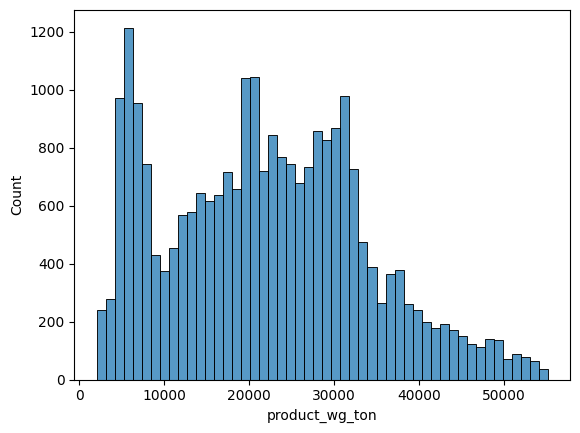

In [24]:
sns.histplot(df['product_wg_ton'],bins=50);

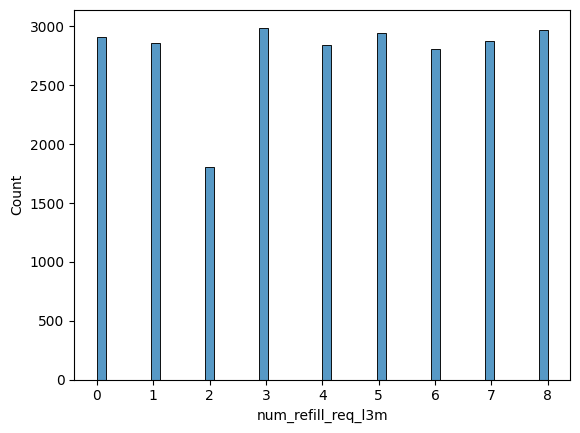

In [25]:
sns.histplot(df['num_refill_req_l3m'],bins=50);

In [26]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='b');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [27]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

16

In [28]:
df_num.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0             4651               24               0            1   
1             6217               47               0            0   
2             4306               64               0            0   
3             6000               50               0            0   
4             4740               42               1            0   

   electric_supply  dist_from_hub  workers_num  wh_est_year  \
0                1             91         29.0          NaN   
1                1            210         31.0          NaN   
2                0            161         37.0          NaN   
3                0            103         21.0          NaN   
4                1            112         25.0       2009.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          13              0                 5   
1                           4              0                 3   
2                          17              0                 6   
3                          17              1                 3   
4                          18              0                 6   

   govt_check_l3m  product_wg_ton  
0              15           17115  
1              17            5074  
2              22           23137  
3              27           22115  
4              24           24071

Description of num_refill_req_l3m
----------------------------------------------------------------------------
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64 Distribution of num_refill_req_l3m
----------------------------------------------------------------------------


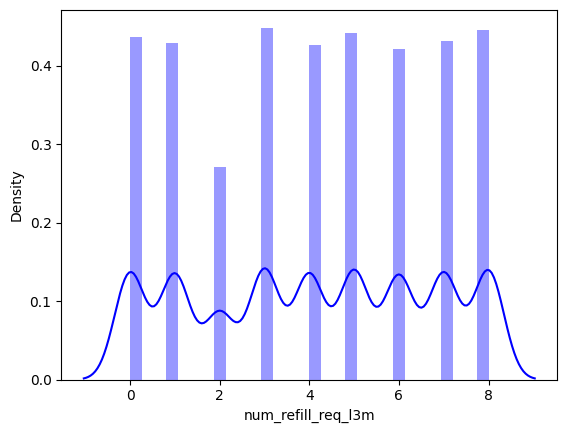

BoxPlot of num_refill_req_l3m
----------------------------------------------------------------------------


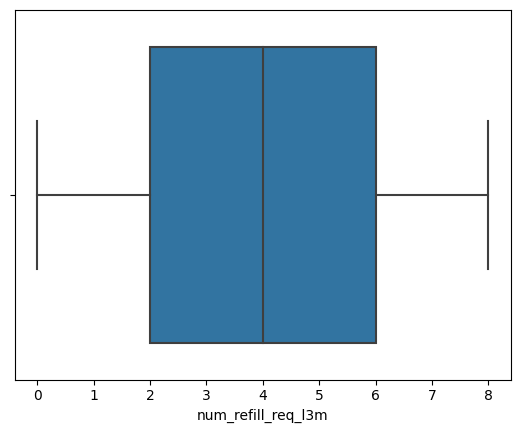

Description of transport_issue_l1y
----------------------------------------------------------------------------
count    25000.000000
mean         0.773680
std          1.199449
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: transport_issue_l1y, dtype: float64 Distribution of transport_issue_l1y
----------------------------------------------------------------------------


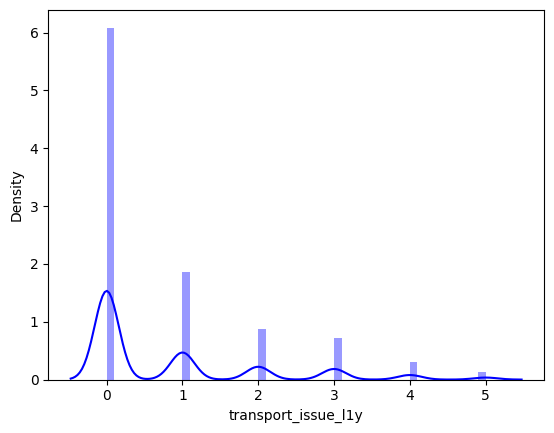

BoxPlot of transport_issue_l1y
----------------------------------------------------------------------------


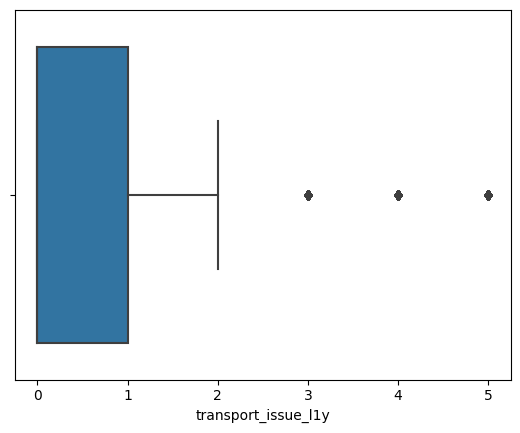

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    25000.000000
mean         3.104200
std          1.141663
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------


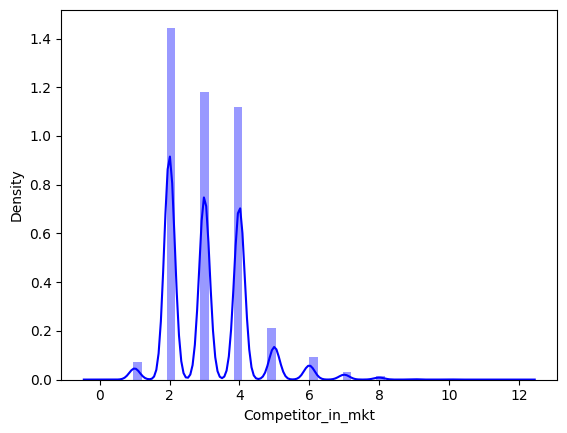

BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


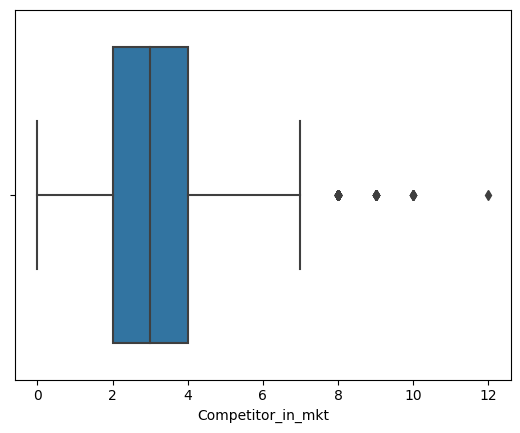

Description of retail_shop_num
----------------------------------------------------------------------------
count    25000.000000
mean      4985.711560
std       1052.825252
min       1821.000000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max      11008.000000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------


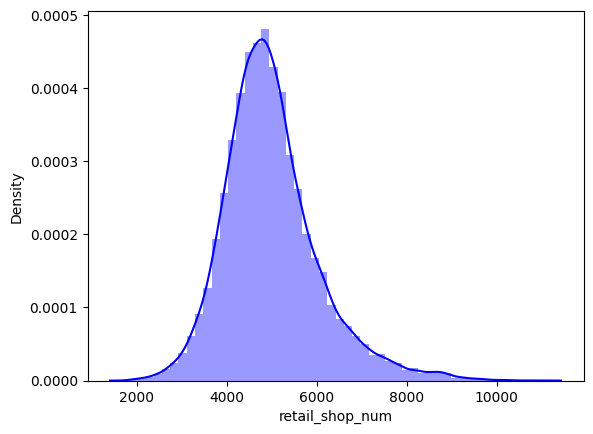

BoxPlot of retail_shop_num
----------------------------------------------------------------------------


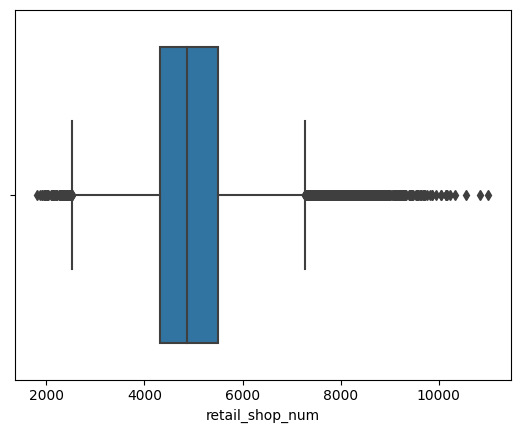

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------


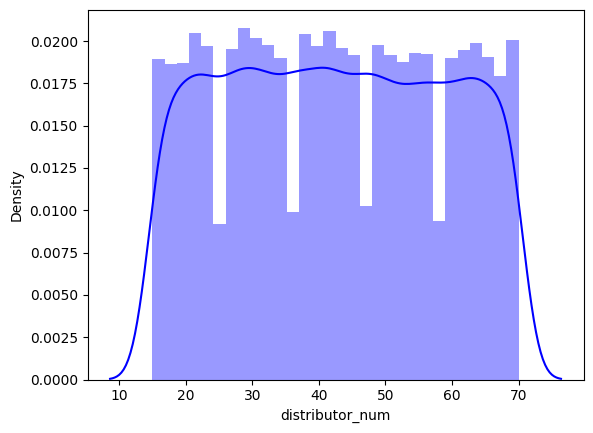

BoxPlot of distributor_num
----------------------------------------------------------------------------


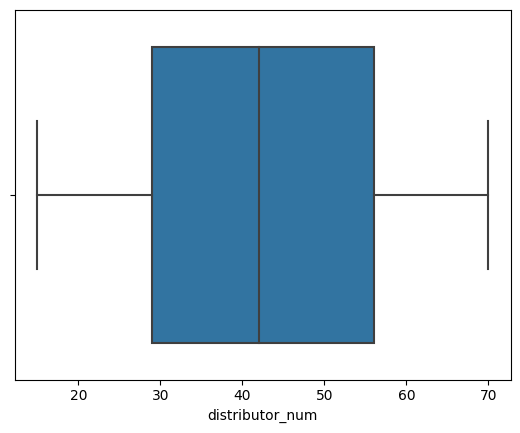

Description of flood_impacted
----------------------------------------------------------------------------
count    25000.000000
mean         0.098160
std          0.297537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_impacted, dtype: float64 Distribution of flood_impacted
----------------------------------------------------------------------------


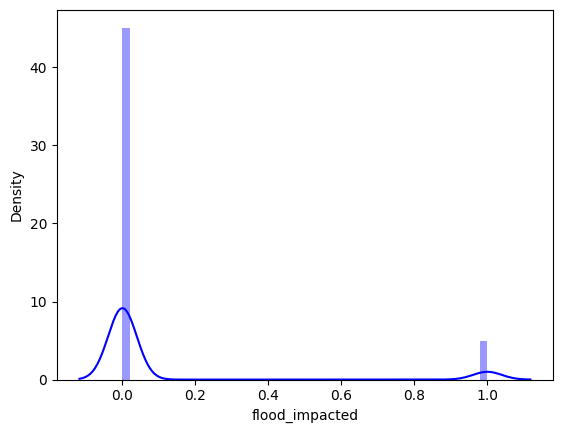

BoxPlot of flood_impacted
----------------------------------------------------------------------------


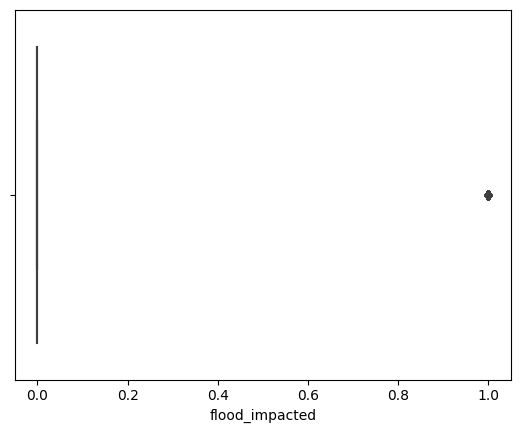

Description of flood_proof
----------------------------------------------------------------------------
count    25000.000000
mean         0.054640
std          0.227281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_proof, dtype: float64 Distribution of flood_proof
----------------------------------------------------------------------------


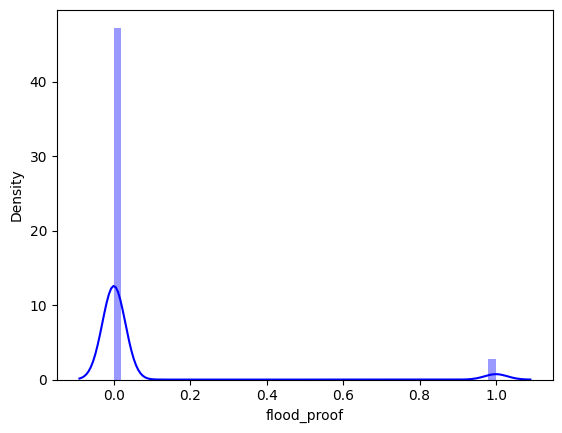

BoxPlot of flood_proof
----------------------------------------------------------------------------


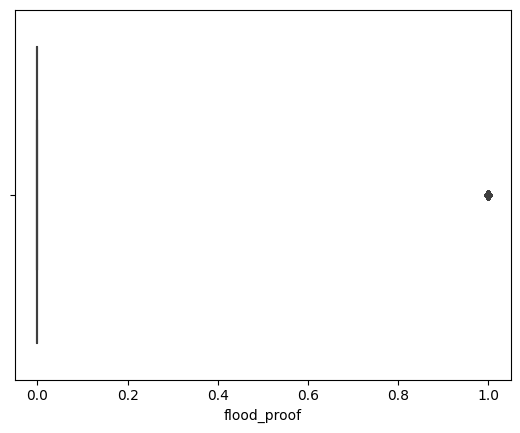

Description of electric_supply
----------------------------------------------------------------------------
count    25000.000000
mean         0.656880
std          0.474761
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: electric_supply, dtype: float64 Distribution of electric_supply
----------------------------------------------------------------------------


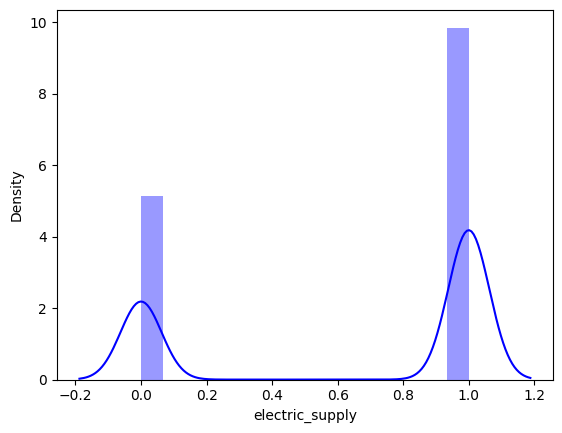

BoxPlot of electric_supply
----------------------------------------------------------------------------


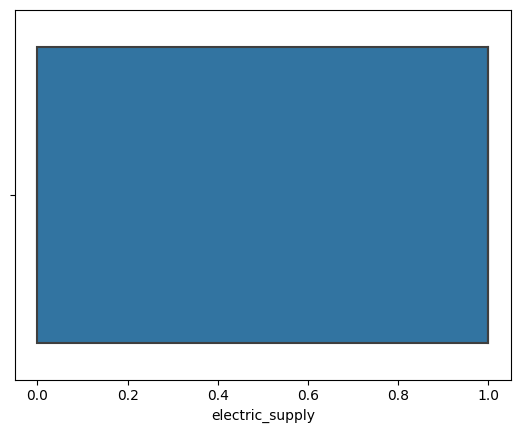

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------


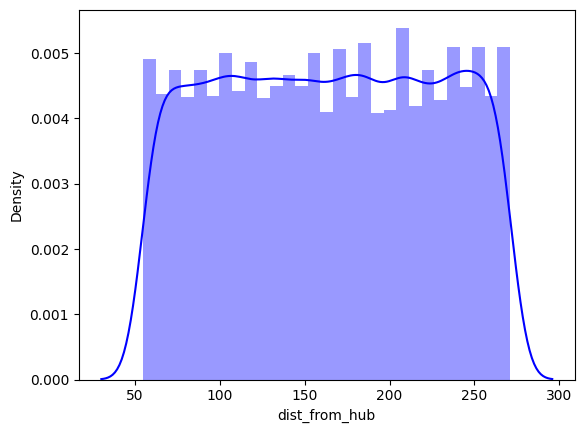

BoxPlot of dist_from_hub
----------------------------------------------------------------------------


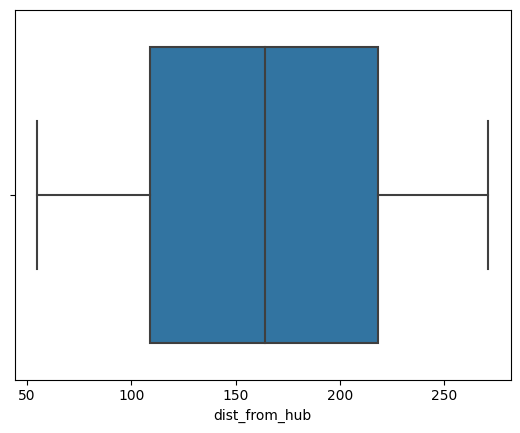

Description of workers_num
----------------------------------------------------------------------------
count    25000.000000
mean        28.907000
std          7.717275
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------


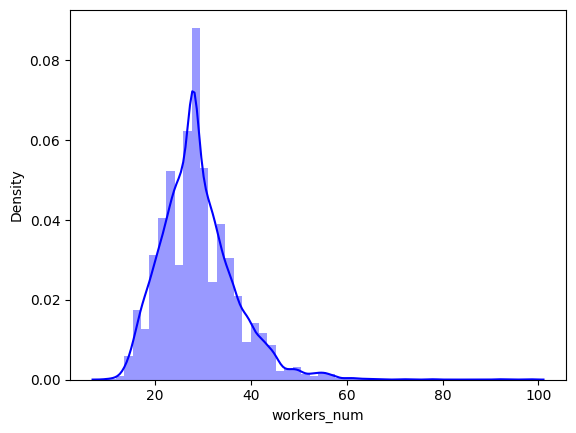

BoxPlot of workers_num
----------------------------------------------------------------------------


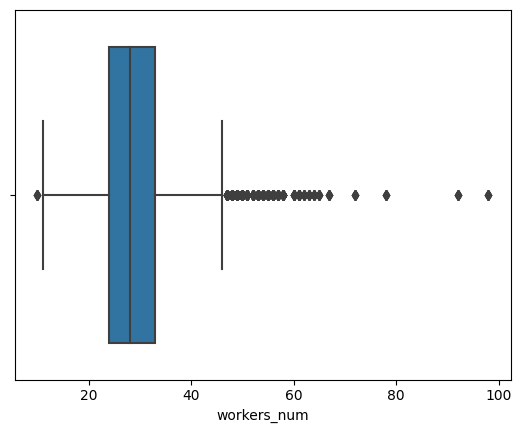

Description of wh_est_year
----------------------------------------------------------------------------
count    13119.000000
mean      2009.383185
std          7.528230
min       1996.000000
25%       2003.000000
50%       2009.000000
75%       2016.000000
max       2023.000000
Name: wh_est_year, dtype: float64 Distribution of wh_est_year
----------------------------------------------------------------------------


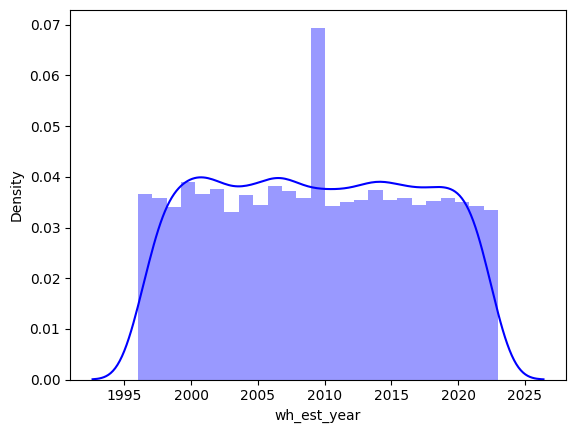

BoxPlot of wh_est_year
----------------------------------------------------------------------------


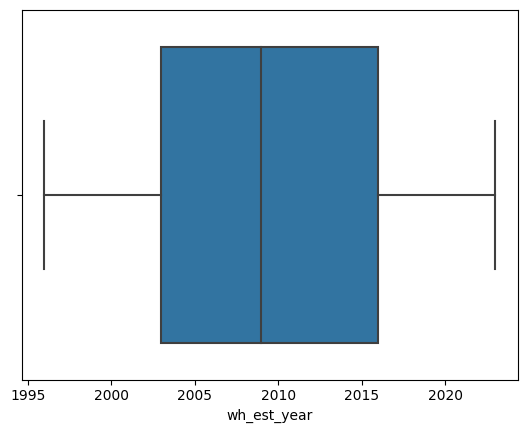

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64 Distribution of storage_issue_reported_l3m
----------------------------------------------------------------------------


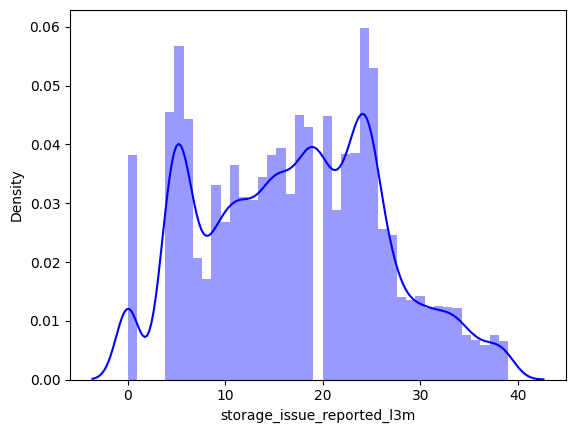

BoxPlot of storage_issue_reported_l3m
----------------------------------------------------------------------------


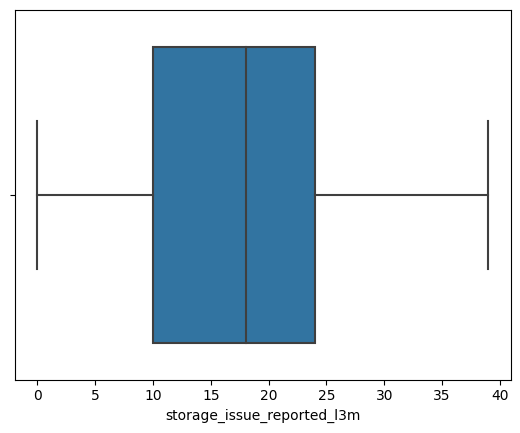

Description of temp_reg_mach
----------------------------------------------------------------------------
count    25000.000000
mean         0.303280
std          0.459684
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: temp_reg_mach, dtype: float64 Distribution of temp_reg_mach
----------------------------------------------------------------------------


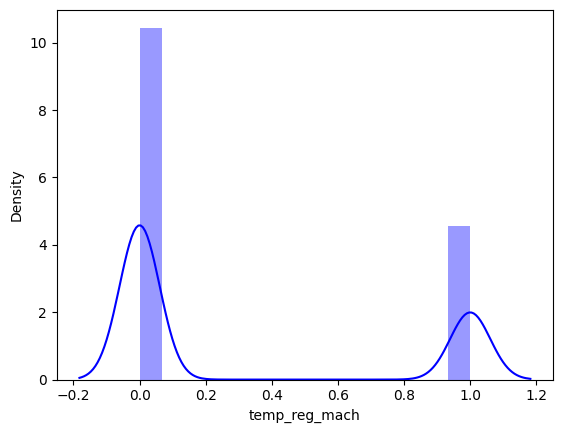

BoxPlot of temp_reg_mach
----------------------------------------------------------------------------


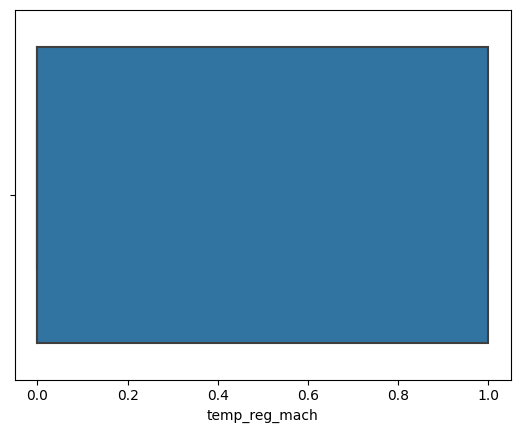

Description of wh_breakdown_l3m
----------------------------------------------------------------------------
count    25000.000000
mean         3.482040
std          1.690335
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: wh_breakdown_l3m, dtype: float64 Distribution of wh_breakdown_l3m
----------------------------------------------------------------------------


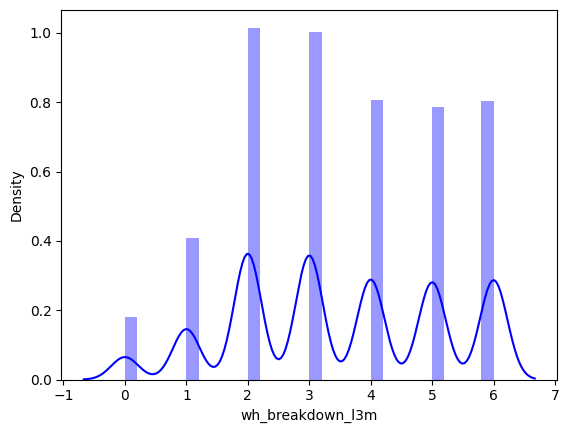

BoxPlot of wh_breakdown_l3m
----------------------------------------------------------------------------


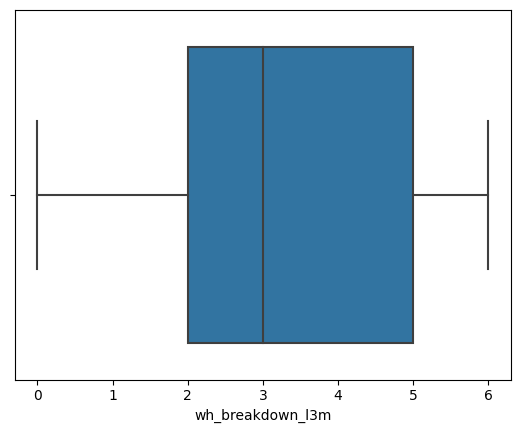

Description of govt_check_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64 Distribution of govt_check_l3m
----------------------------------------------------------------------------


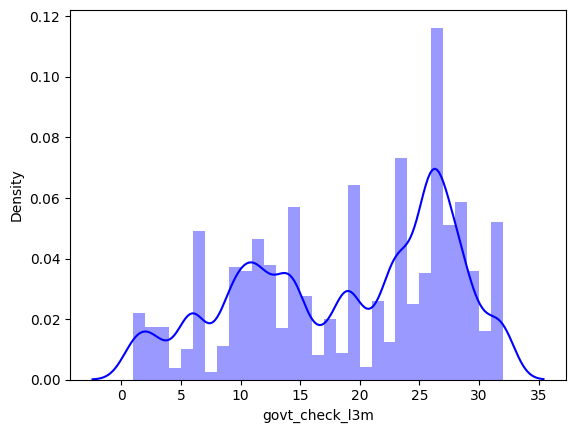

BoxPlot of govt_check_l3m
----------------------------------------------------------------------------


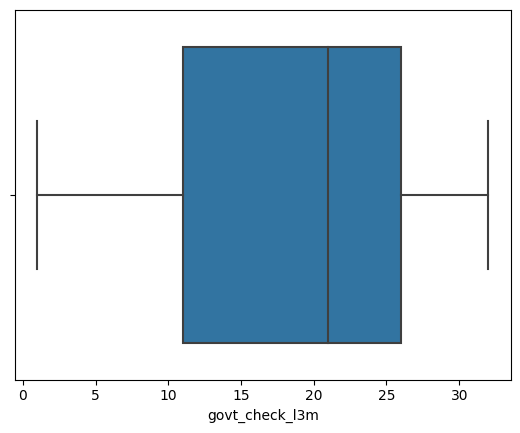

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------


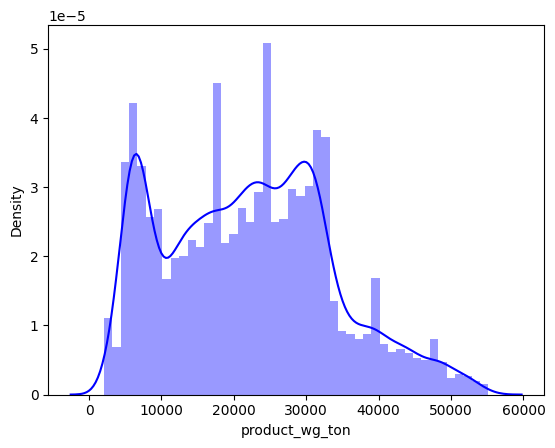

BoxPlot of product_wg_ton
----------------------------------------------------------------------------


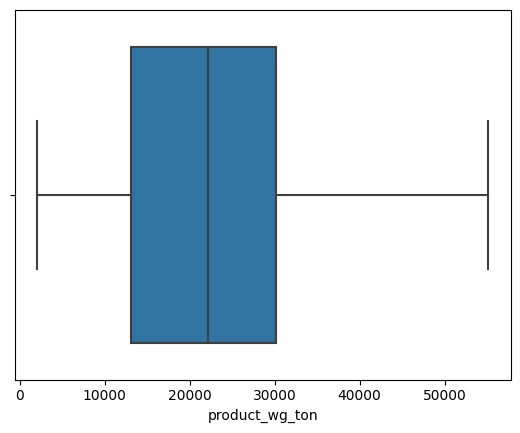

In [29]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [30]:
df.corr()

num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                    1.000000             0.018549   
transport_issue_l1y                   0.018549             1.000000   
Competitor_in_mkt                     0.002985            -0.005826   
retail_shop_num                      -0.001186            -0.001826   
distributor_num                       0.003995             0.008993   
flood_impacted                       -0.010548            -0.009596   
flood_proof                          -0.001123             0.000022   
electric_supply                      -0.007959            -0.009299   
dist_from_hub                         0.000048             0.014336   
workers_num                          -0.013665            -0.008825   
wh_est_year                           0.015363            -0.012910   
storage_issue_reported_l3m           -0.006602            -0.144327   
temp_reg_mach                         0.260928             0.018207   
wh_breakdown_l3m                      0.000608             0.012990   
govt_check_l3m                       -0.003302             0.002190   
product_wg_ton                        0.001415            -0.173992   

                            Competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                   0.002985        -0.001186   
transport_issue_l1y                 -0.005826        -0.001826   
Competitor_in_mkt                    1.000000        -0.156943   
retail_shop_num                     -0.156943         1.000000   
distributor_num                     -0.001492        -0.000395   
flood_impacted                       0.009338        -0.003774   
flood_proof                         -0.003444         0.007223   
electric_supply                      0.001759        -0.009207   
dist_from_hub                        0.008407         0.000429   
workers_num                          0.000174        -0.005301   
wh_est_year                         -0.011202         0.005721   
storage_issue_reported_l3m           0.009543        -0.006632   
temp_reg_mach                        0.009524        -0.001273   
wh_breakdown_l3m                     0.012733        -0.008420   
govt_check_l3m                      -0.043455         0.045749   
product_wg_ton                       0.008884        -0.006615   

                            distributor_num  flood_impacted  flood_proof  \
num_refill_req_l3m                 0.003995       -0.010548    -0.001123   
transport_issue_l1y                0.008993       -0.009596     0.000022   
Competitor_in_mkt                 -0.001492        0.009338    -0.003444   
retail_shop_num                   -0.000395       -0.003774     0.007223   
distributor_num                    1.000000        0.004611    -0.003409   
flood_impacted                     0.004611        1.000000     0.107015   
flood_proof                       -0.003409        0.107015     1.000000   
electric_supply                    0.000454        0.164815     0.114811   
dist_from_hub                     -0.011838        0.000749    -0.005315   
workers_num                       -0.014359        0.158500     0.036536   
wh_est_year                       -0.012295       -0.000668    -0.003329   
storage_issue_reported_l3m         0.003396       -0.003157    -0.002712   
temp_reg_mach                      0.002827       -0.008554     0.005636   
wh_breakdown_l3m                   0.004286       -0.001744    -0.005151   
govt_check_l3m                    -0.007934        0.000587    -0.003600   
product_wg_ton                     0.004999       -0.002299    -0.000441   

                            electric_supply  dist_from_hub  workers_num  \
num_refill_req_l3m                -0.007959       0.000048    -0.013665   
transport_issue_l1y               -0.009299       0.014336    -0.008825   
Competitor_in_mkt                  0.001759       0.008407     0.000174   
retail_shop_num                   -0.009207       0.000429    -0.005301   
distributor_num              

In [31]:
corr = df_num.corr(method='pearson')

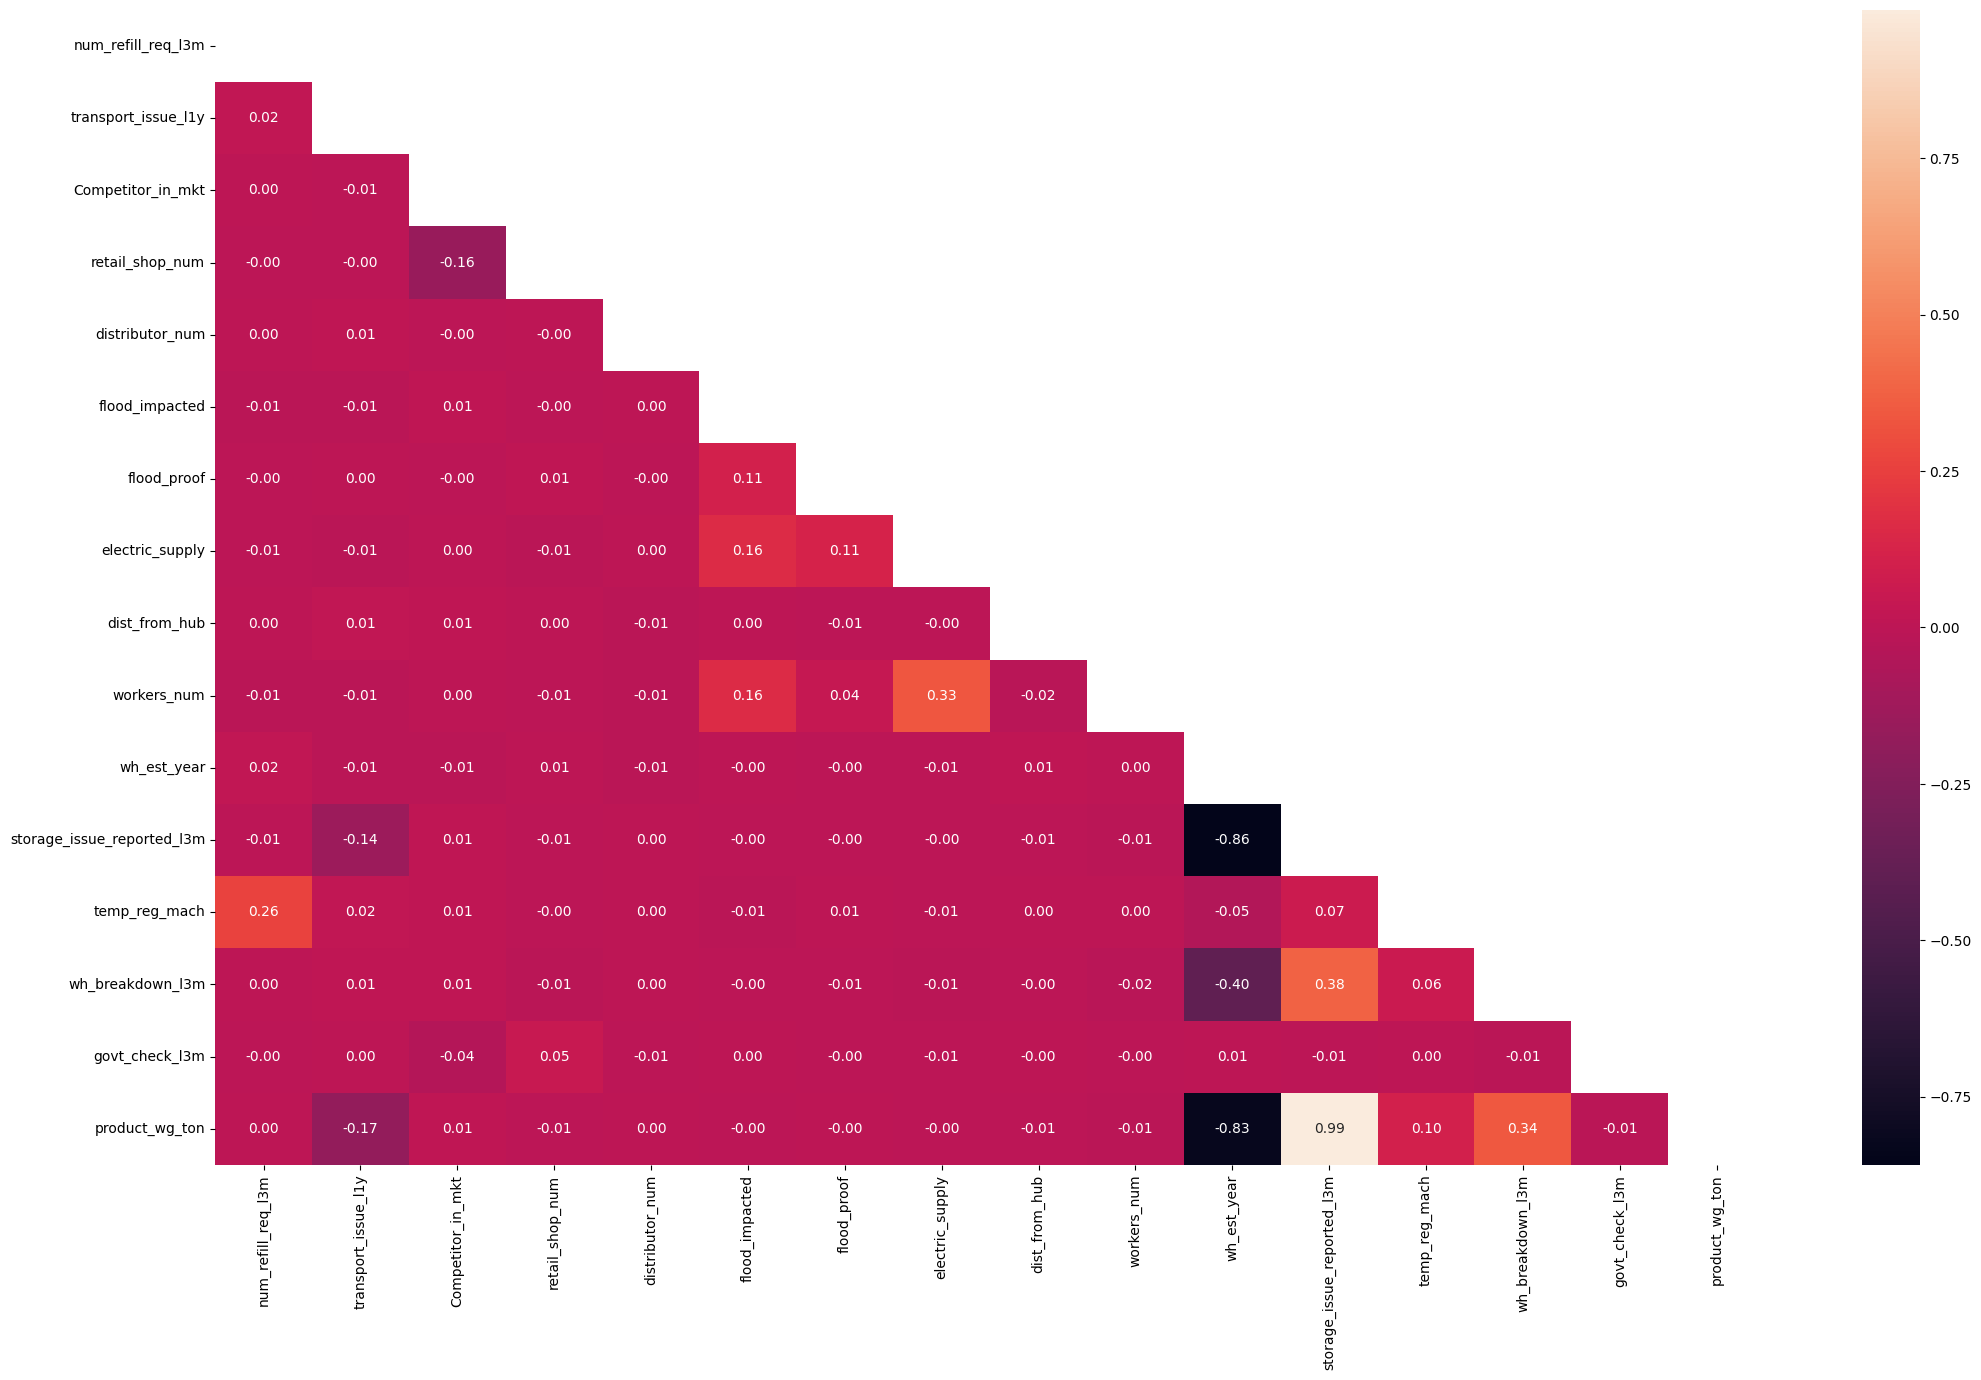

In [32]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

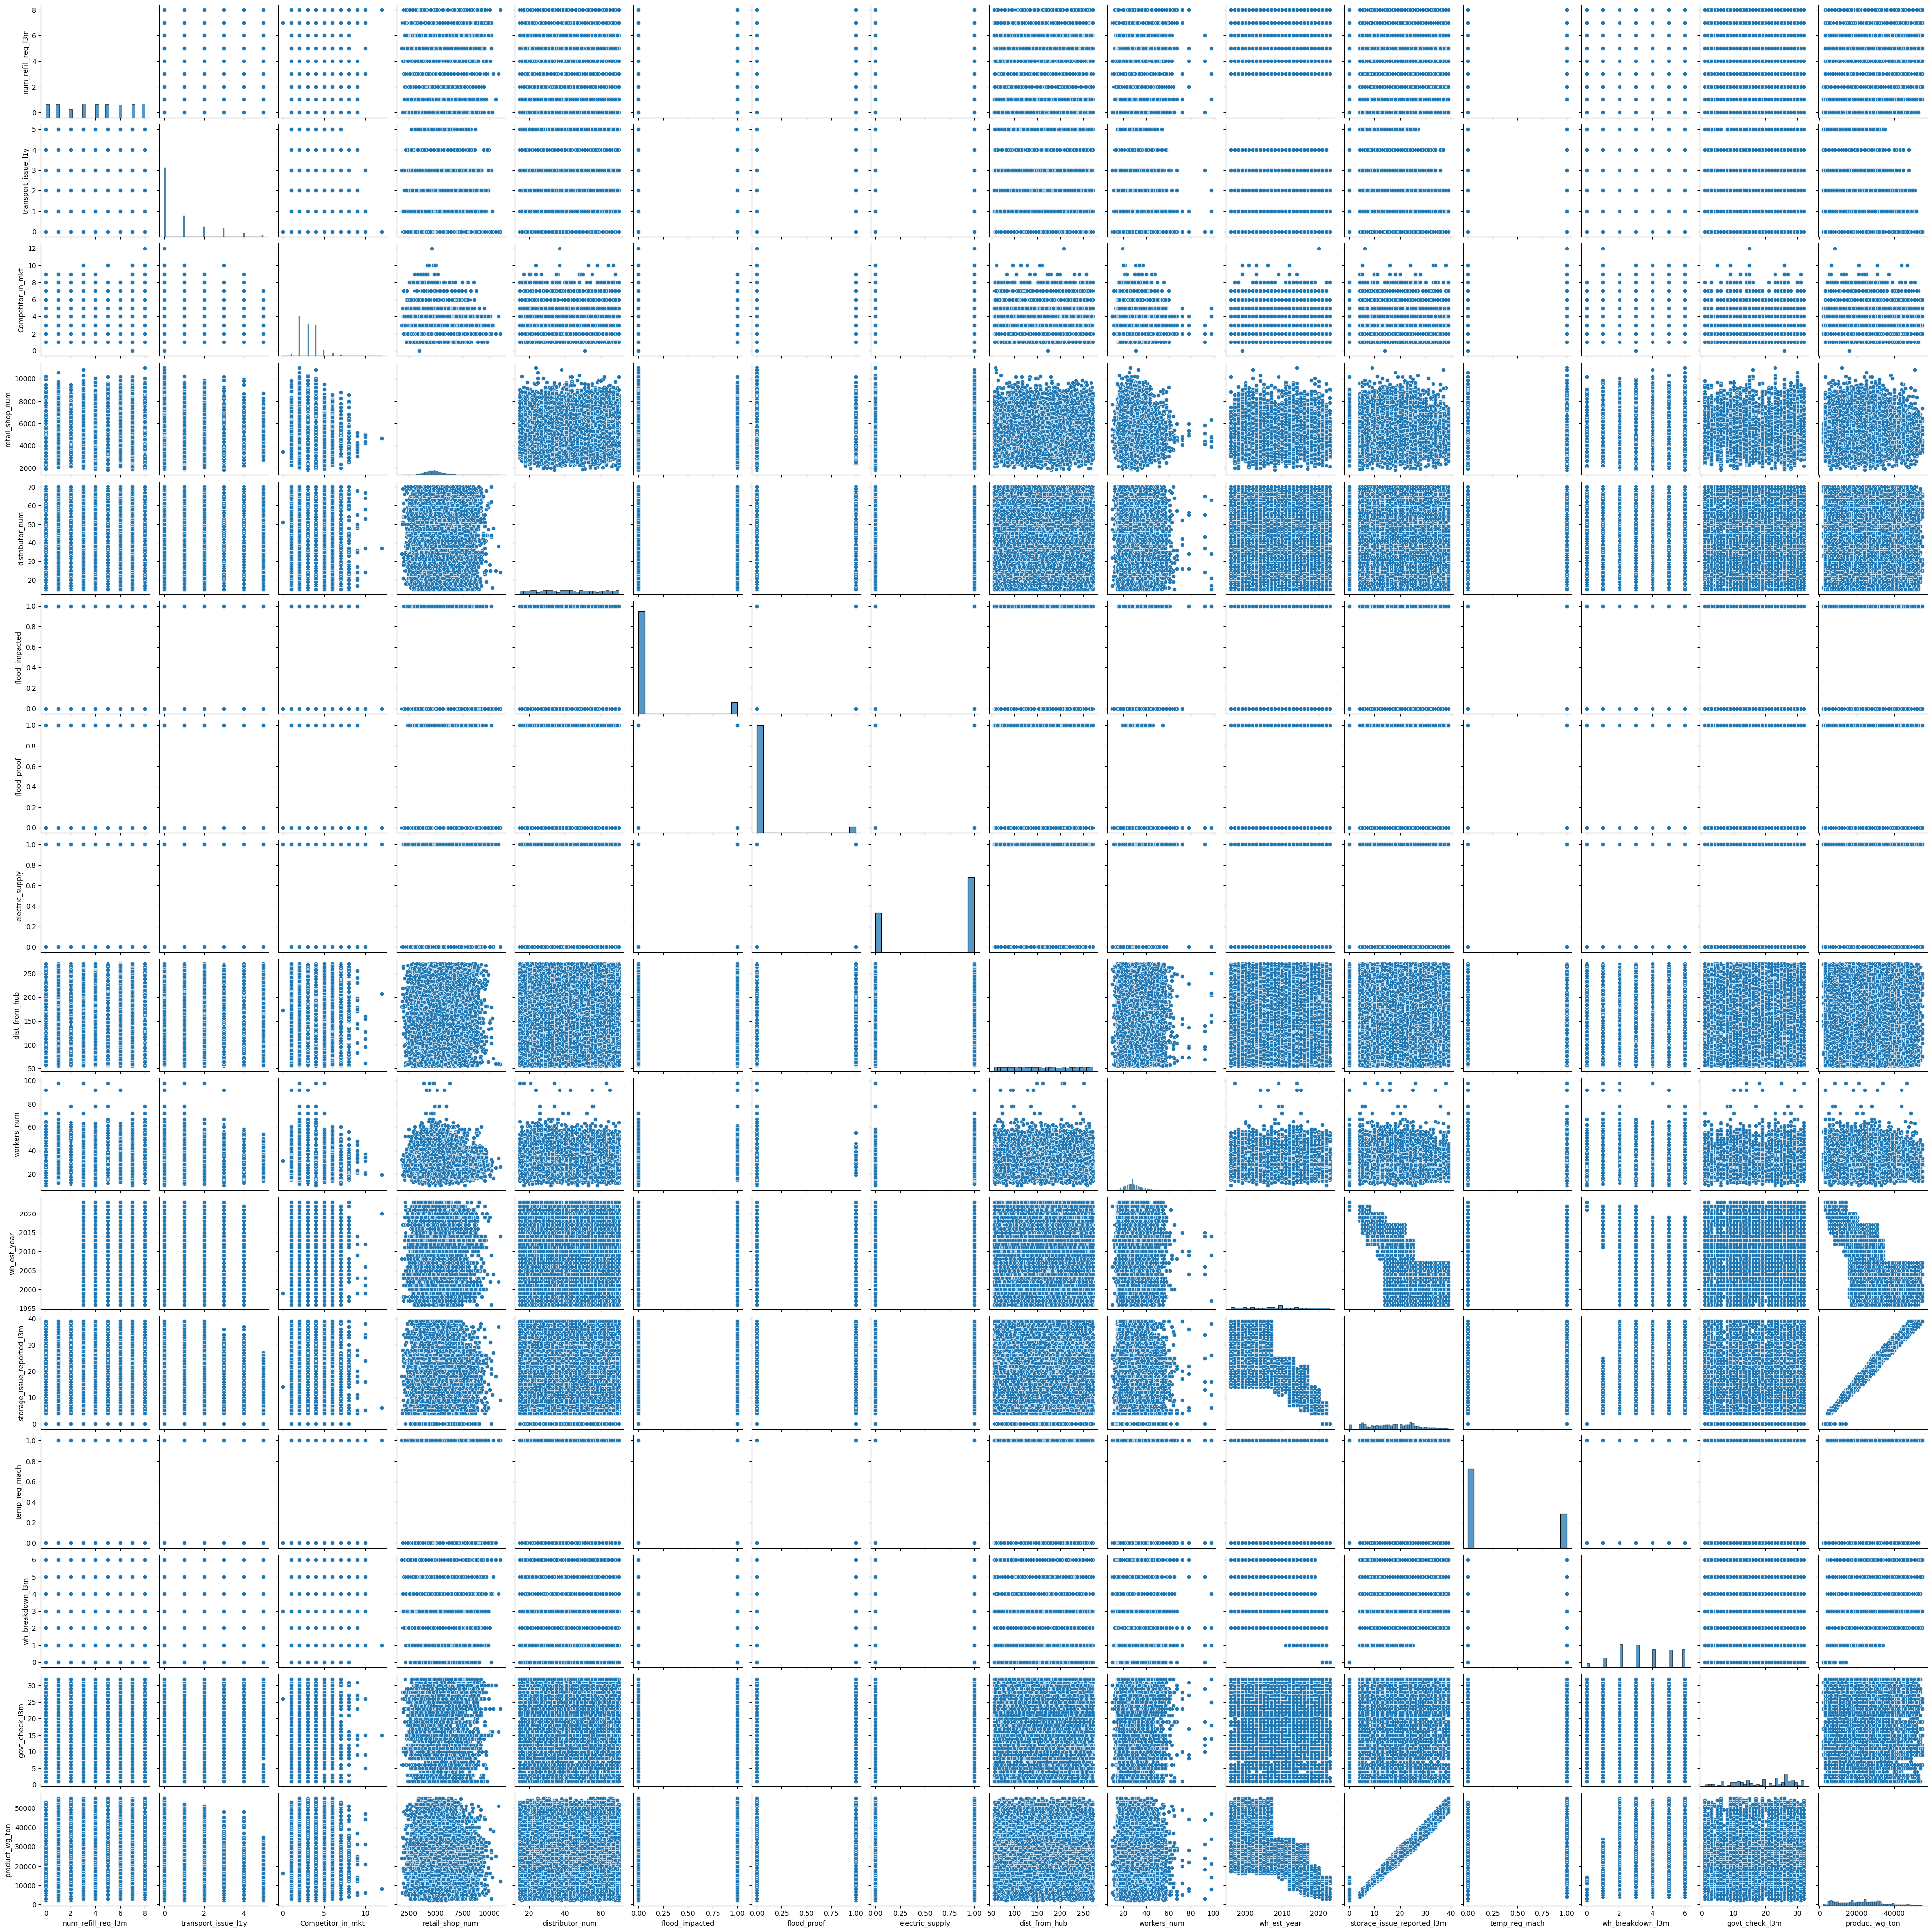

In [33]:
sns.pairplot(df_num)
plt.show()

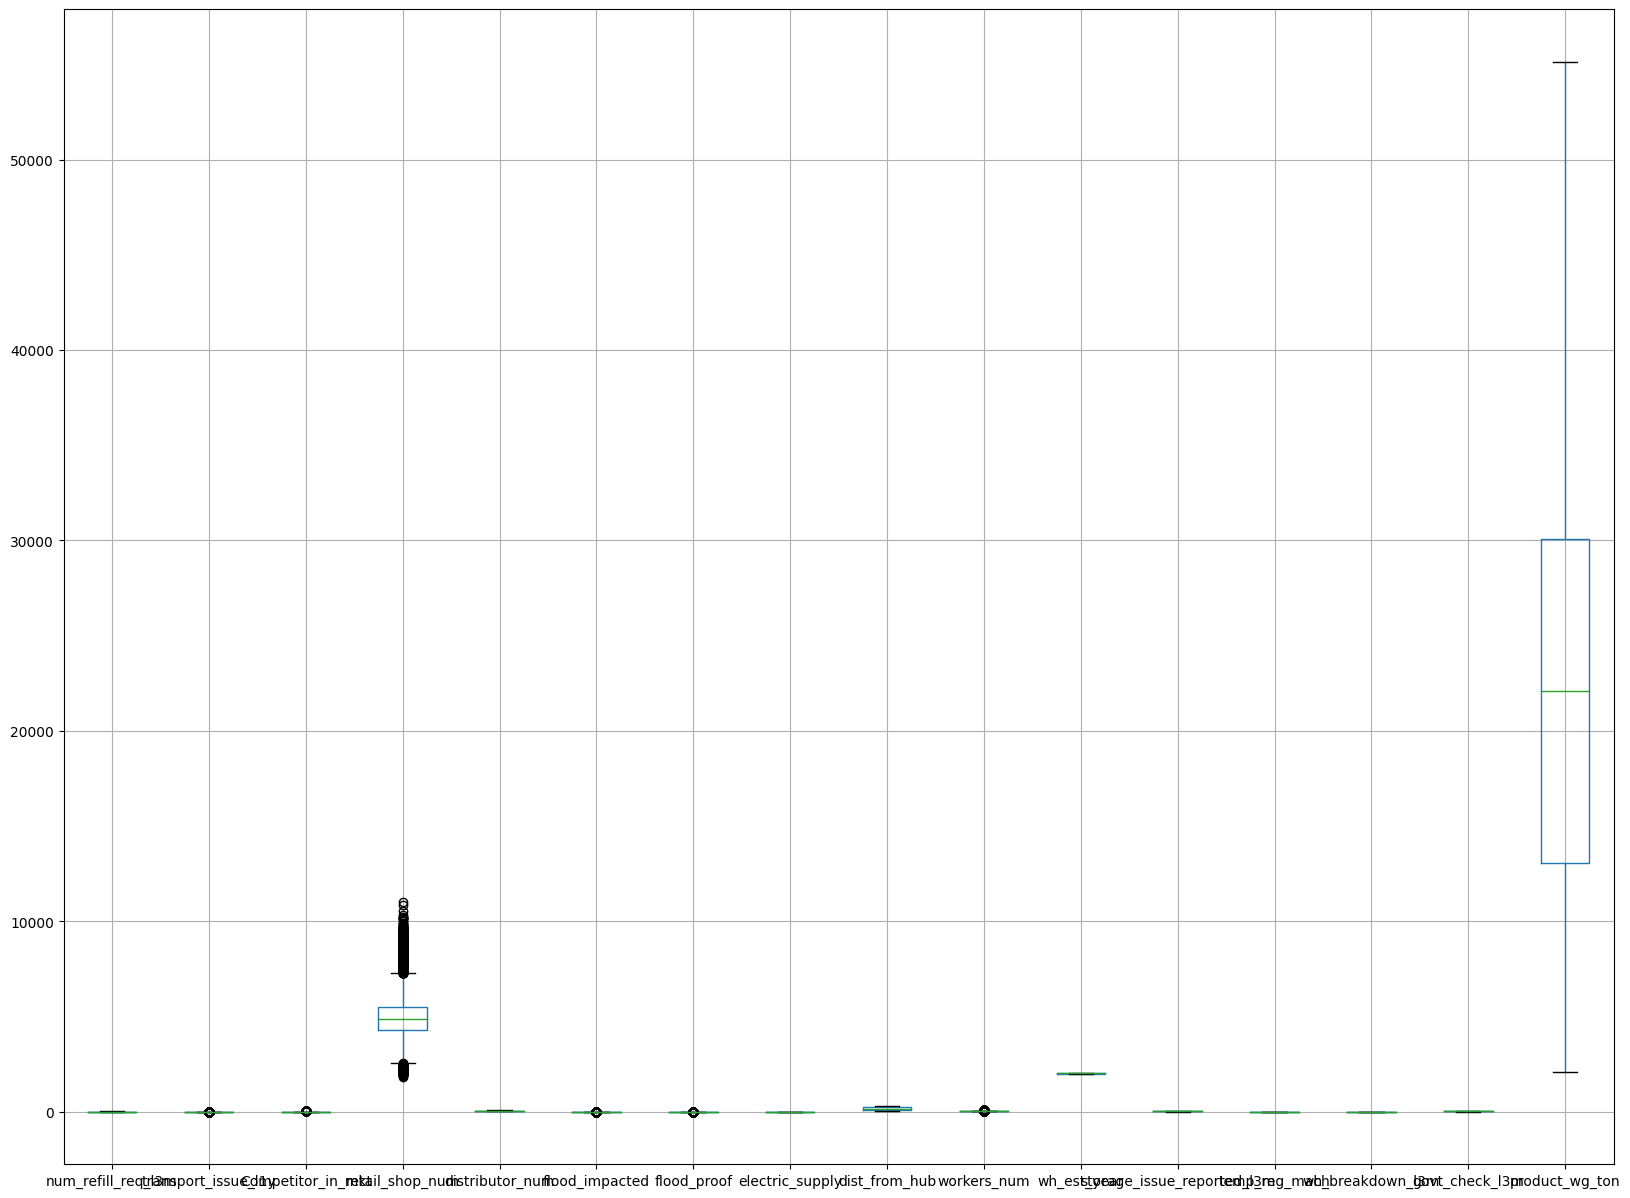

In [34]:
df_num.boxplot(figsize=(20,15))
plt.show()

# Outlier Treatment

In [35]:
def remove_outlier(col):
  sorted(col) 
  Q1,Q3=np.percentile(col,[25,75]) 
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR) 
  upper_range= Q3+(1.5 * IQR) 
  return lower_range,upper_range

In [36]:
for column in df.columns:
    if df[column].dtype !='object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

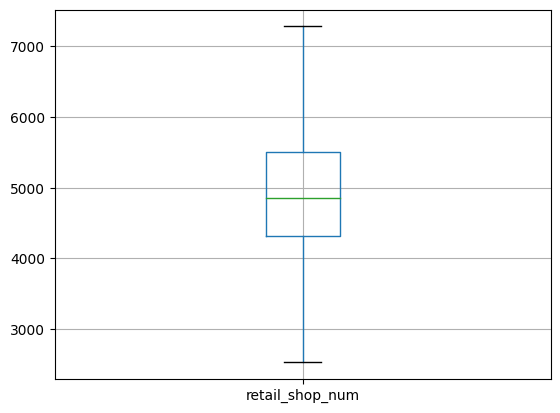

In [37]:
df.boxplot(column=['retail_shop_num'])
plt.show()

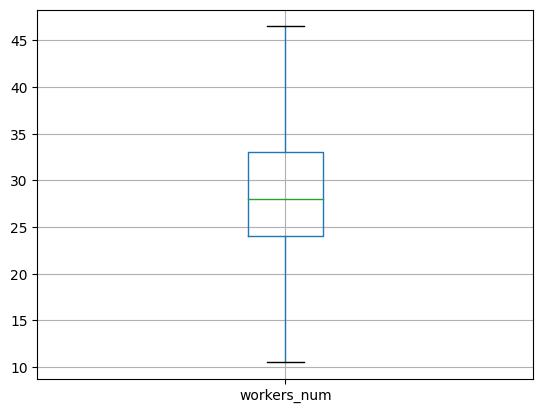

In [38]:
df.boxplot(column=['workers_num'])
plt.show()

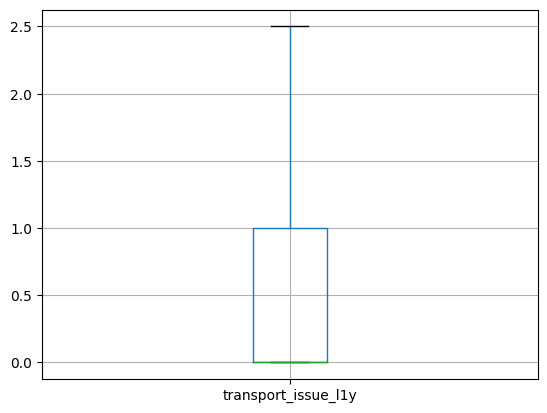

In [39]:
df.boxplot(column=['transport_issue_l1y'])
plt.show()

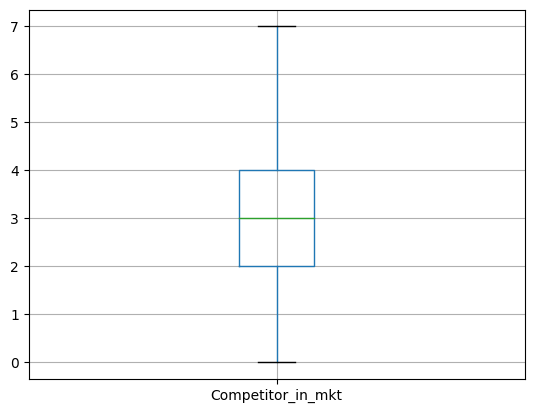

In [40]:
df.boxplot(column=['Competitor_in_mkt'])
plt.show()

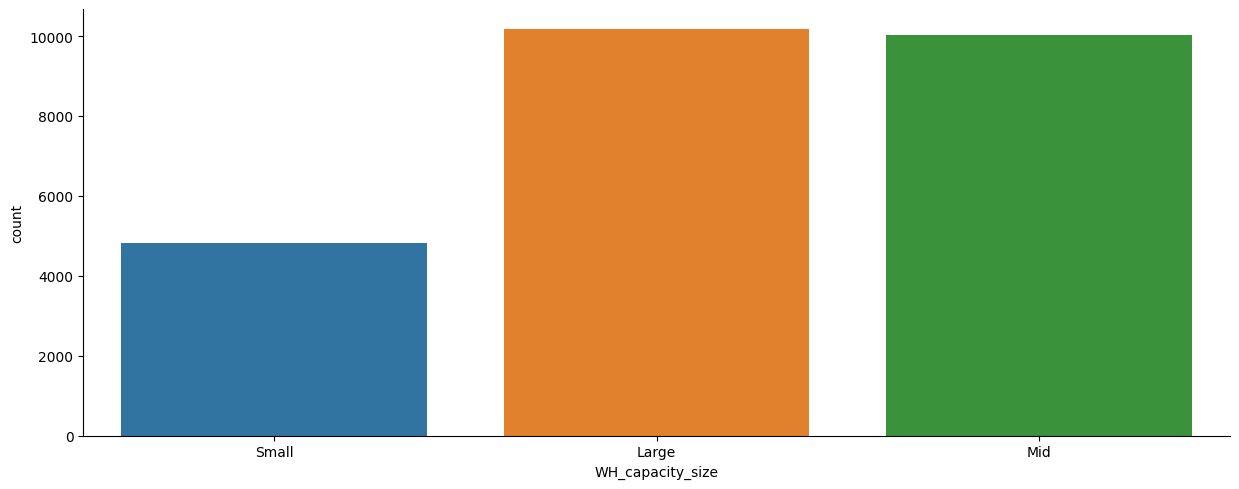

In [41]:
sns.catplot(x = 'WH_capacity_size', data=df, kind='count',aspect=2.5)

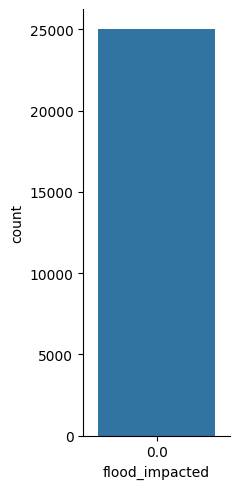

In [42]:
sns.catplot(x = 'flood_impacted', data=df, kind='count',aspect=0.5)

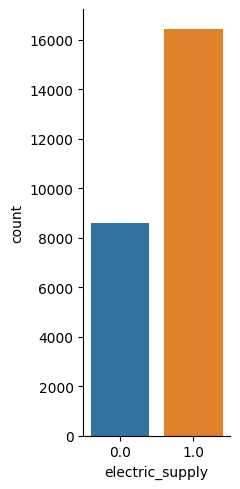

In [43]:
sns.catplot(x = 'electric_supply', data=df, kind='count',aspect=0.5)

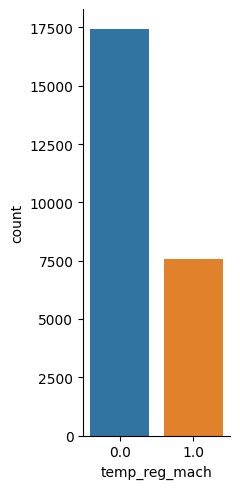

In [44]:
sns.catplot(x='temp_reg_mach', data=df, kind='count',aspect=0.5)

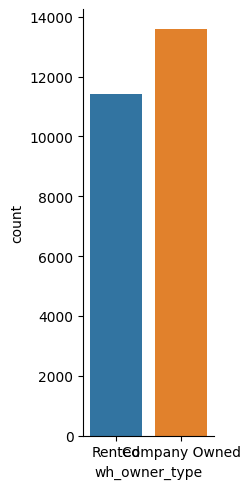

In [45]:
sns.catplot(x='wh_owner_type', data=df, kind='count',aspect=0.5)

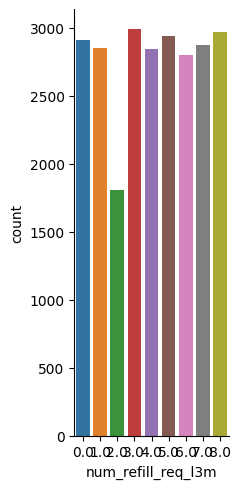

In [46]:
sns.catplot(x='num_refill_req_l3m', data=df, kind='count',aspect=0.5)

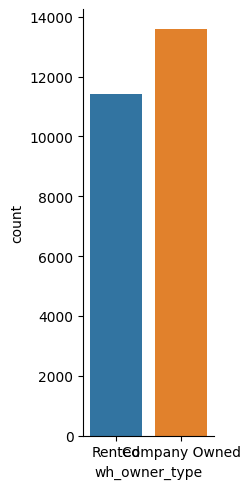

In [47]:
sns.catplot(x='wh_owner_type', data=df, kind='count',aspect=0.5)

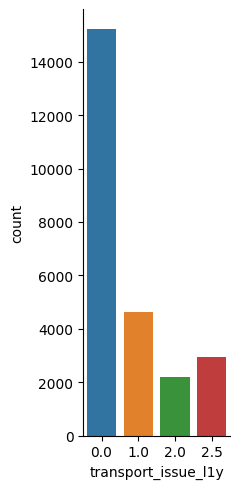

In [48]:
sns.catplot(x='transport_issue_l1y', data=df, kind='count',aspect=0.5)

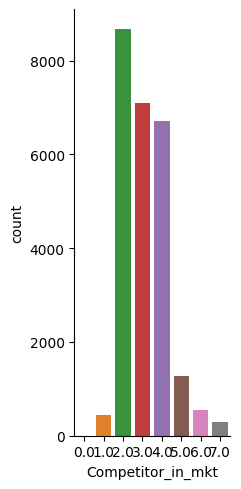

In [49]:
sns.catplot(x='Competitor_in_mkt', data=df, kind='count',aspect=0.5)

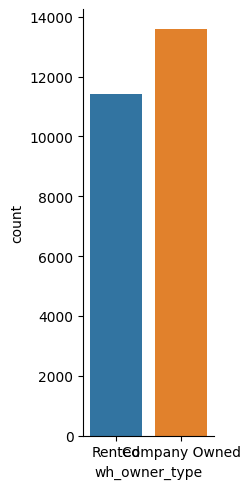

In [50]:
sns.catplot(x='wh_owner_type', data=df, kind='count',aspect=0.5)

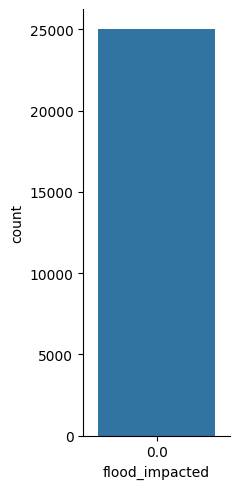

In [51]:
sns.catplot(x='flood_impacted', data=df, kind='count',aspect=0.5)

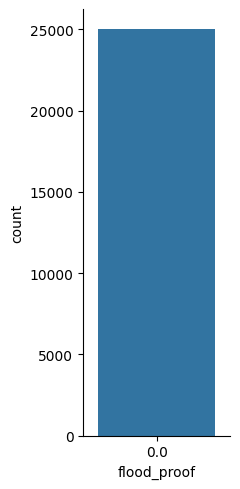

In [52]:
sns.catplot(x='flood_proof', data=df, kind='count',aspect=0.5)

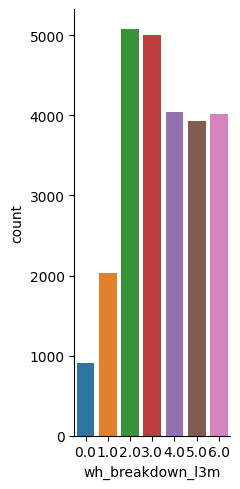

In [53]:
sns.catplot(x='wh_breakdown_l3m', data=df, kind='count',aspect=0.5)

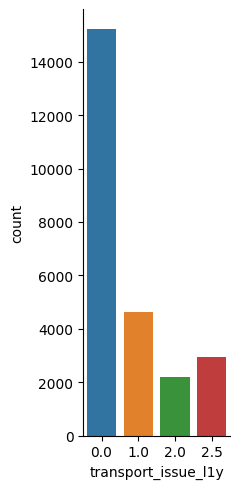

In [54]:
sns.catplot(x='transport_issue_l1y', data=df, kind='count',aspect=0.5)

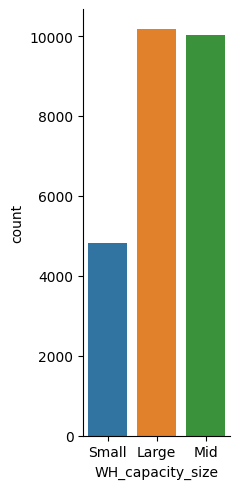

In [55]:
sns.catplot(x='WH_capacity_size', data=df, kind='count',aspect=0.5)

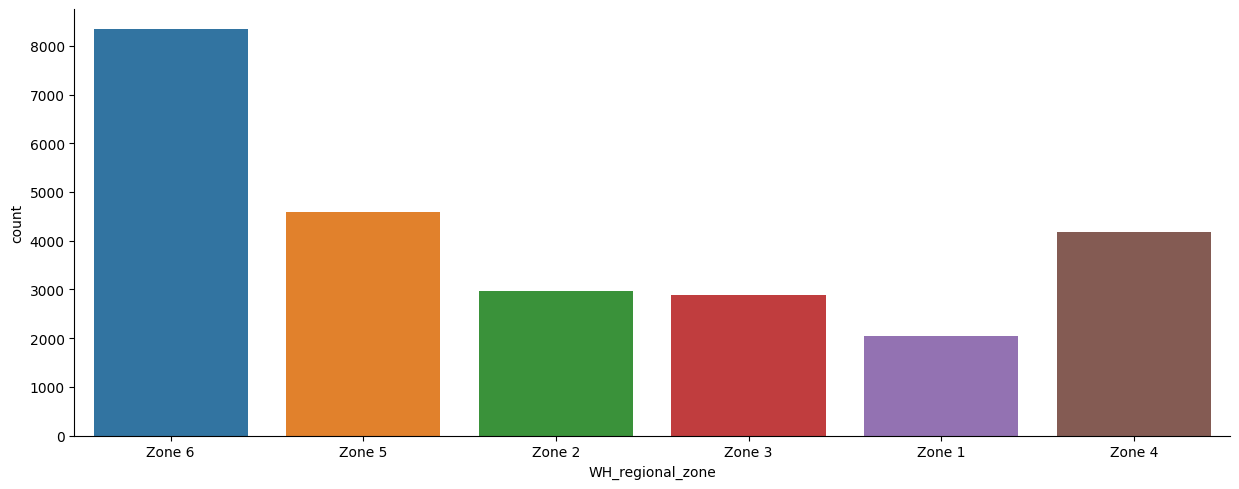

In [56]:
sns.catplot(x='WH_regional_zone', data=df, kind='count',aspect=2.5)

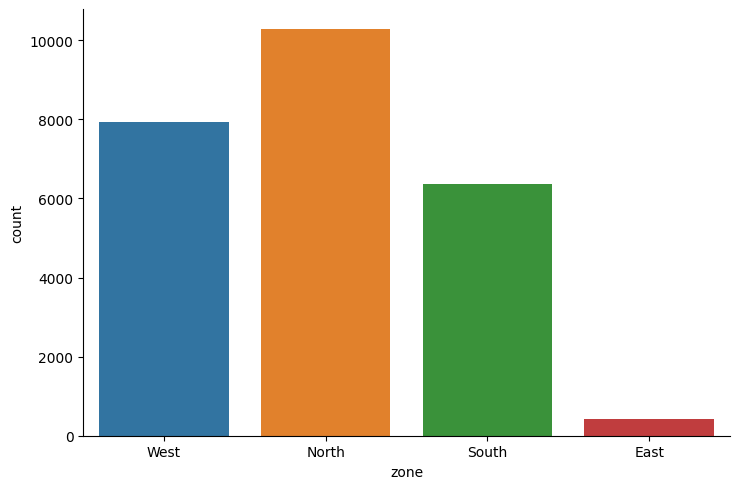

In [57]:
sns.catplot(x='zone', data=df, kind='count',aspect=1.5)

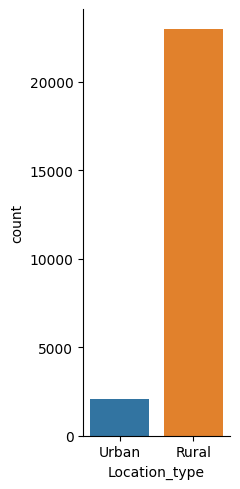

In [58]:
sns.catplot(x='Location_type', data=df, kind='count',aspect=0.5)

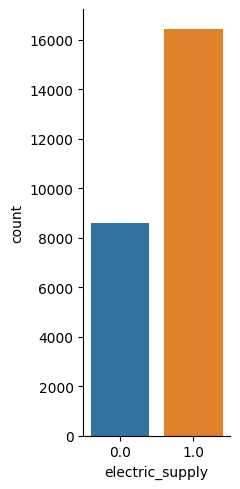

In [59]:
sns.catplot(x='electric_supply', data=df, kind='count',aspect=0.5)

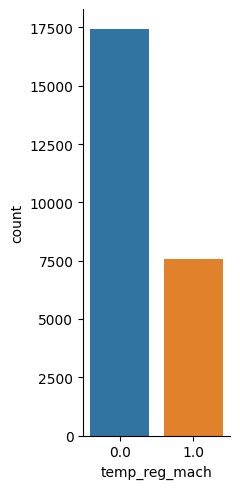

In [60]:
sns.catplot(x='temp_reg_mach', data=df, kind='count',aspect=0.5)

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

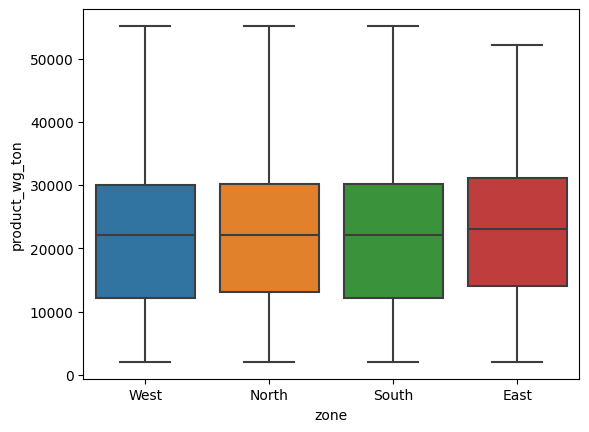

In [61]:
sns.boxplot(data = df, x='zone',y='product_wg_ton')

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

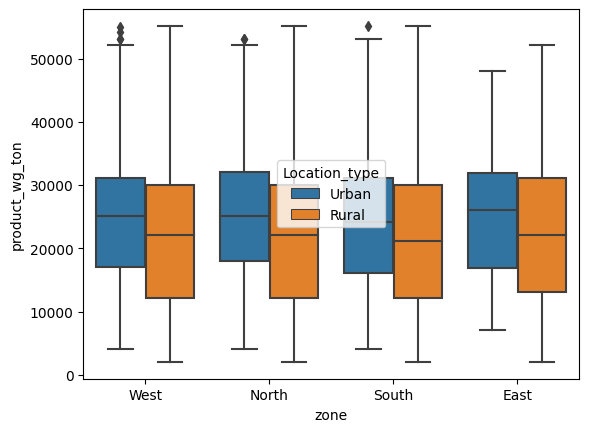

In [62]:
sns.boxplot(data = df, x='zone',y='product_wg_ton', hue='Location_type')

<AxesSubplot: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

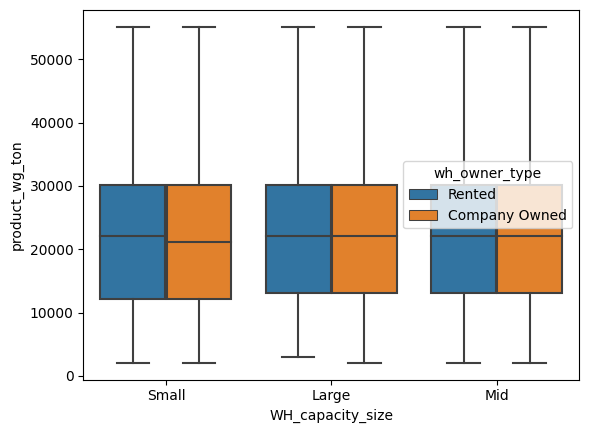

In [63]:
sns.boxplot(data = df, x='WH_capacity_size',y='product_wg_ton', hue='wh_owner_type')

<AxesSubplot: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

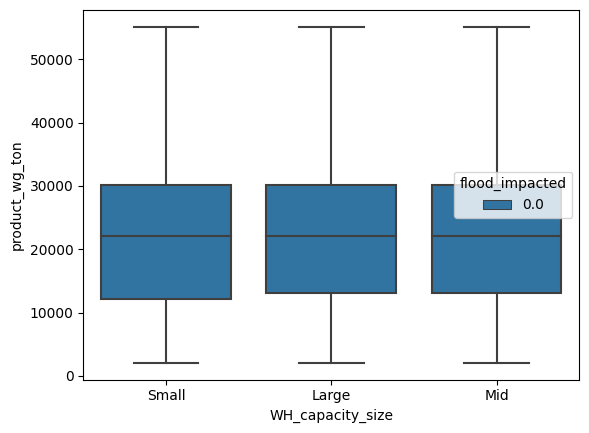

In [64]:
sns.boxplot(data = df, x='WH_capacity_size',y='product_wg_ton', hue='flood_impacted')

<AxesSubplot: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

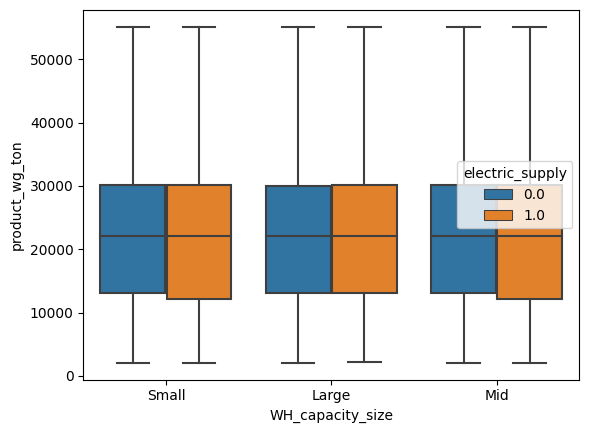

In [65]:
sns.boxplot(data = df, x='WH_capacity_size',y='product_wg_ton', hue='electric_supply')

<AxesSubplot: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

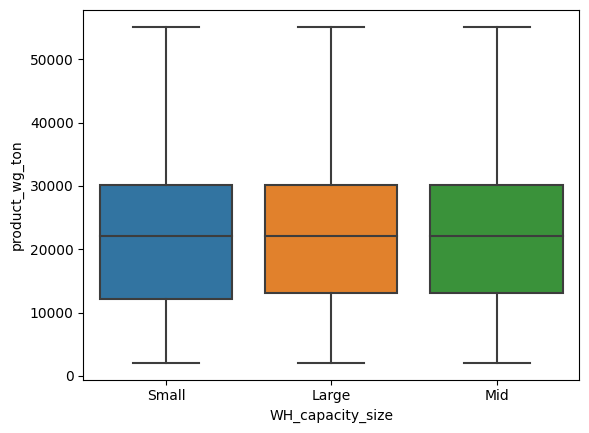

In [66]:
sns.boxplot(data = df, x='WH_capacity_size',y='product_wg_ton')

<AxesSubplot: xlabel='Competitor_in_mkt', ylabel='product_wg_ton'>

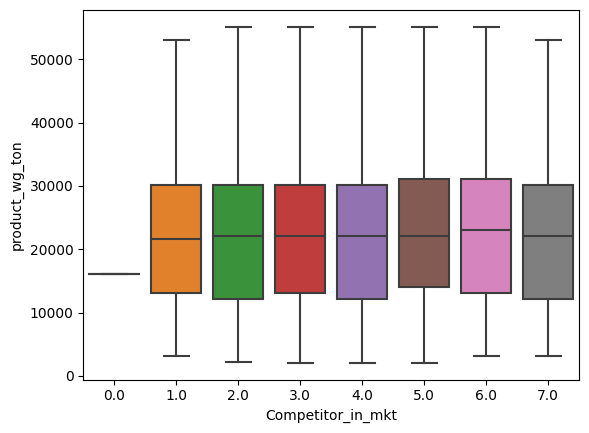

In [67]:
sns.boxplot(data = df, x='Competitor_in_mkt',y='product_wg_ton')

<AxesSubplot: xlabel='Competitor_in_mkt', ylabel='product_wg_ton'>

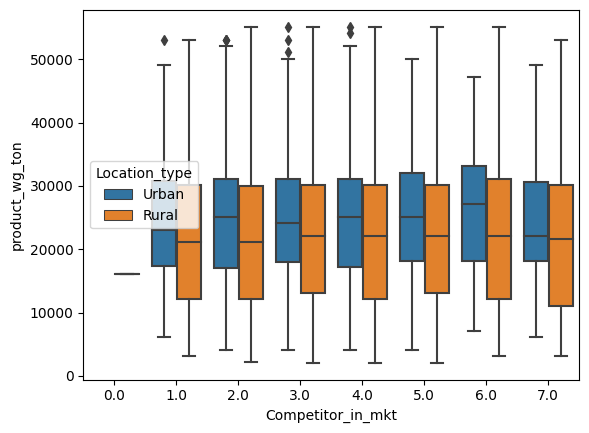

In [68]:
sns.boxplot(data = df, x='Competitor_in_mkt',y='product_wg_ton', hue='Location_type')

<AxesSubplot: xlabel='transport_issue_l1y', ylabel='product_wg_ton'>

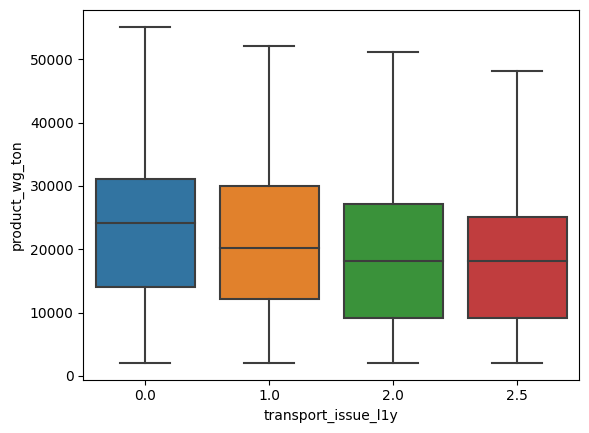

In [69]:
sns.boxplot(data = df, x='transport_issue_l1y',y='product_wg_ton')

<AxesSubplot: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

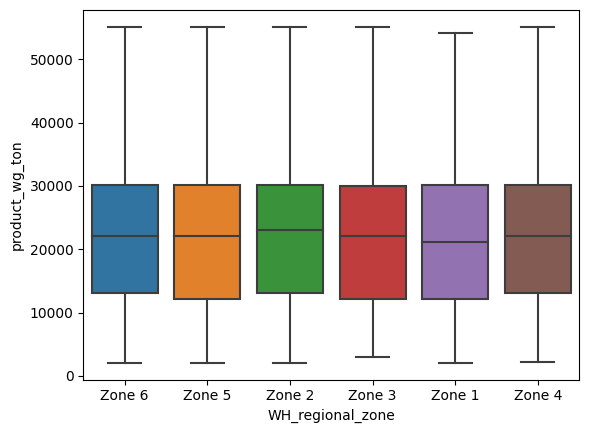

In [70]:
sns.boxplot(data = df, x='WH_regional_zone',y='product_wg_ton')

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

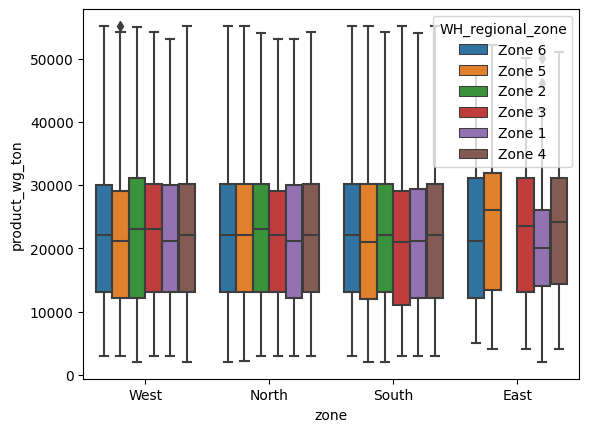

In [71]:
sns.boxplot(data = df, x='zone',y='product_wg_ton',hue='WH_regional_zone')

<AxesSubplot: xlabel='transport_issue_l1y', ylabel='zone'>

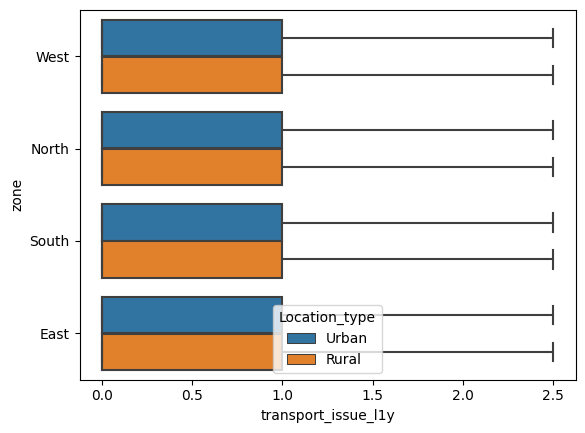

In [72]:
sns.boxplot(data = df, x='transport_issue_l1y',y='zone',hue='Location_type')

In [73]:
df['approved_wh_govt_certificate'].value_counts(1)

C     0.25636
B+    0.19668
B     0.19248
A     0.18684
A+    0.16764
Name: approved_wh_govt_certificate, dtype: float64

In [74]:
df['WH_capacity_size'].value_counts(1)

Large    0.40676
Mid      0.40080
Small    0.19244
Name: WH_capacity_size, dtype: float64

In [75]:
df['temp_reg_mach'].value_counts(1)

0.0    0.69672
1.0    0.30328
Name: temp_reg_mach, dtype: float64

In [76]:
df['electric_supply'].value_counts(1)

1.0    0.65688
0.0    0.34312
Name: electric_supply, dtype: float64

In [77]:
df['flood_impacted'].value_counts(1)

0.0    1.0
Name: flood_impacted, dtype: float64

In [78]:

df['flood_proof'].value_counts(1)

0.0    1.0
Name: flood_proof, dtype: float64

In [79]:
df['wh_breakdown_l3m'].value_counts(1)

2.0    0.20304
3.0    0.20024
4.0    0.16148
6.0    0.16048
5.0    0.15700
1.0    0.08144
0.0    0.03632
Name: wh_breakdown_l3m, dtype: float64

In [80]:
df['zone'].value_counts(1)

North    0.41112
West     0.31724
South    0.25448
East     0.01716
Name: zone, dtype: float64

In [81]:
df['temp_reg_mach'].value_counts(1)

0.0    0.69672
1.0    0.30328
Name: temp_reg_mach, dtype: float64

In [82]:
df['WH_regional_zone'].value_counts(1)

Zone 6    0.33356
Zone 5    0.18348
Zone 4    0.16704
Zone 2    0.11852
Zone 3    0.11524
Zone 1    0.08216
Name: WH_regional_zone, dtype: float64

In [83]:
df['wh_owner_type'].value_counts(1)

Company Owned    0.54312
Rented           0.45688
Name: wh_owner_type, dtype: float64

In [84]:
df['temp_reg_mach'].value_counts(1)

0.0    0.69672
1.0    0.30328
Name: temp_reg_mach, dtype: float64

## Ware House Owner Type 

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

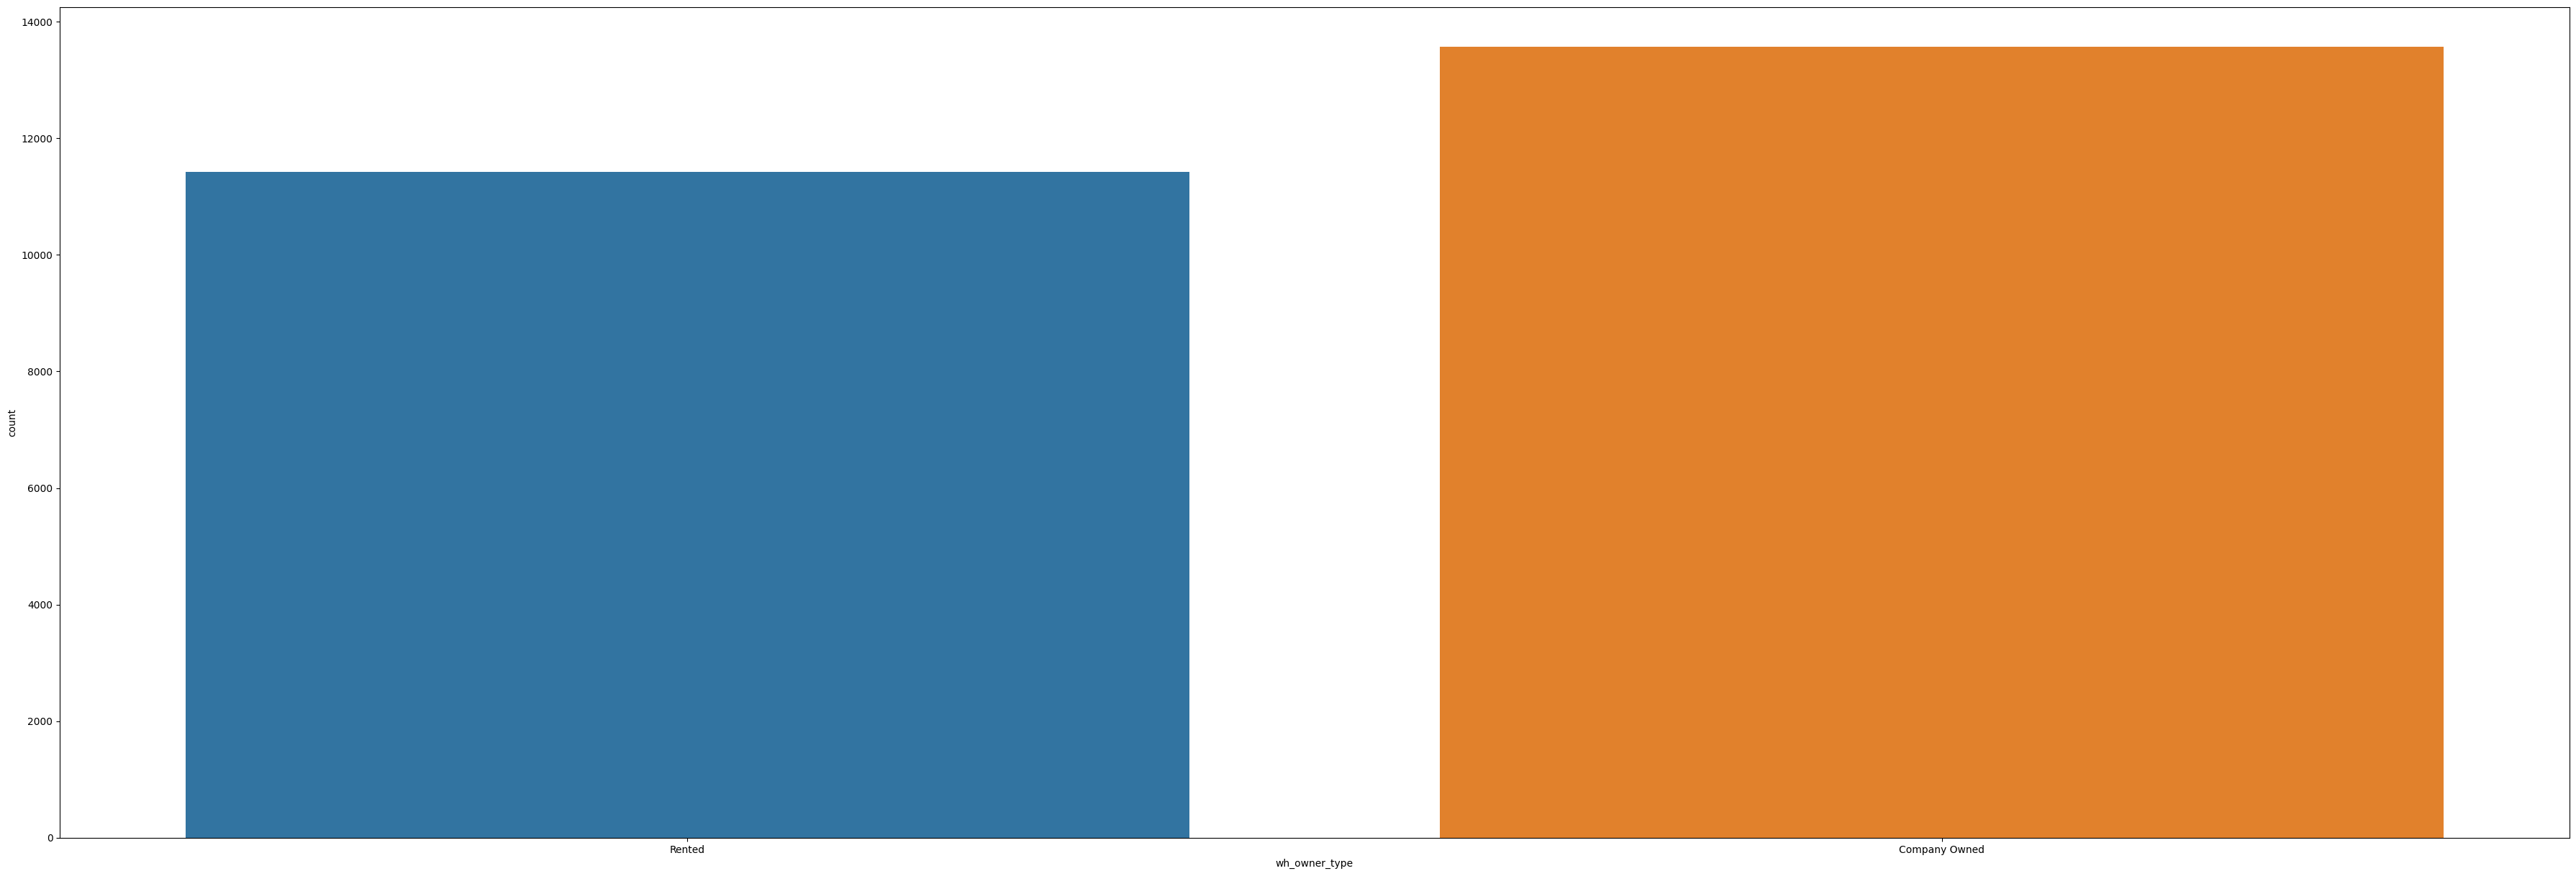

In [85]:
plt.figure(figsize=(45,15))
sns.countplot(data = df, x = 'wh_owner_type')
df.wh_owner_type.value_counts()

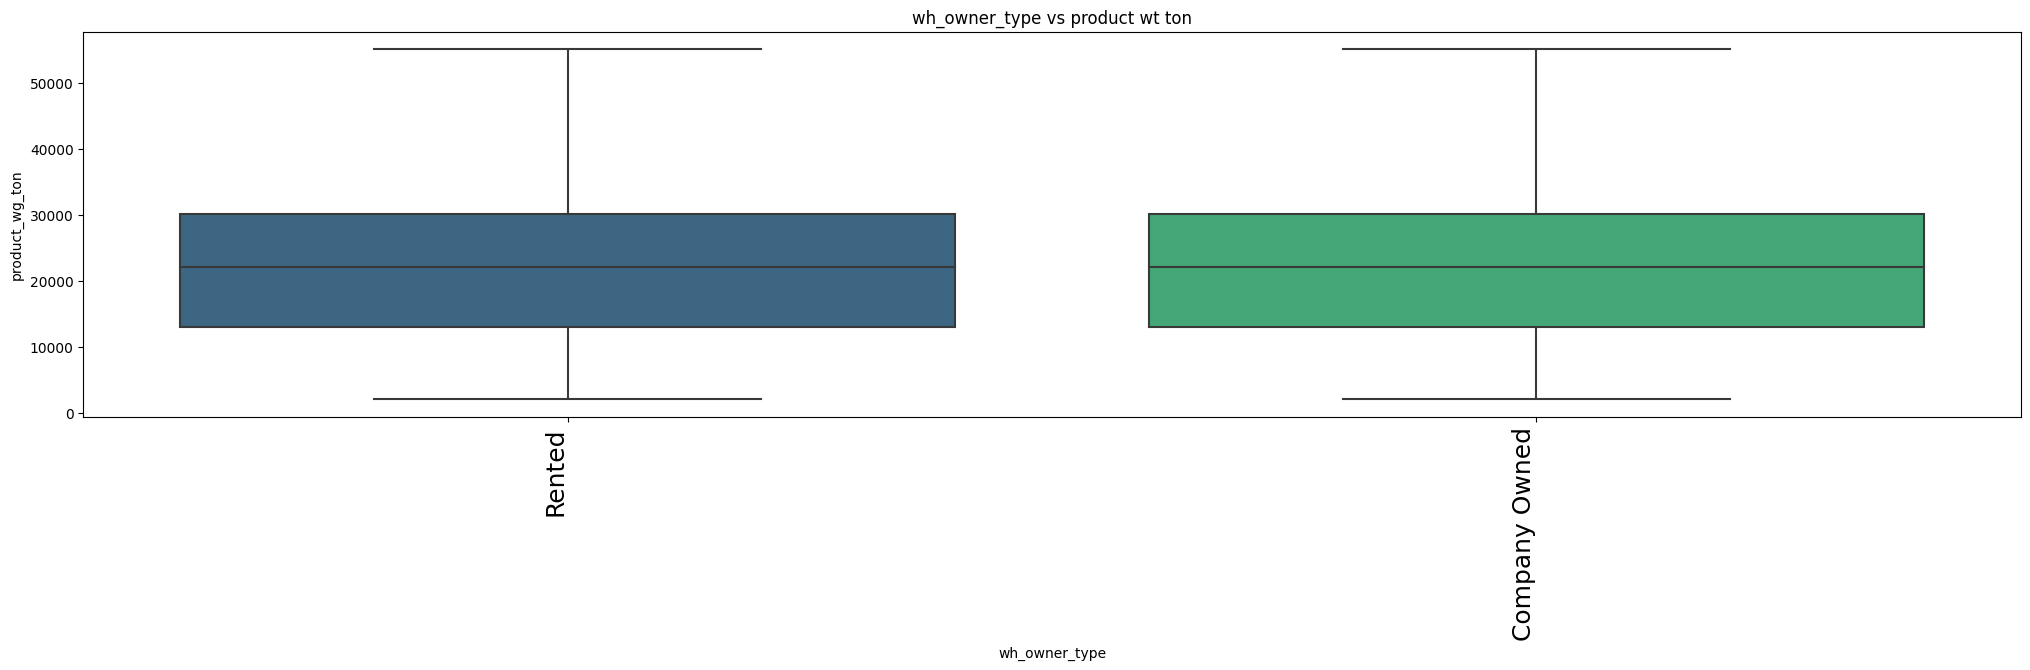

In [86]:
plt.figure(figsize=(25,5))

chart=sns.boxplot(x="wh_owner_type", y="product_wg_ton", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=18)
plt.title('wh_owner_type vs product wt ton')
chart;

<AxesSubplot: xlabel='wh_owner_type', ylabel='product_wg_ton'>

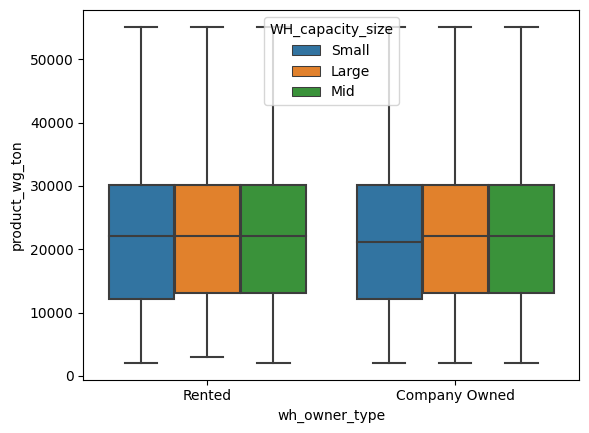

In [87]:
sns.boxplot(data = df, x='wh_owner_type',y='product_wg_ton', hue='WH_capacity_size')

<AxesSubplot: xlabel='wh_owner_type', ylabel='product_wg_ton'>

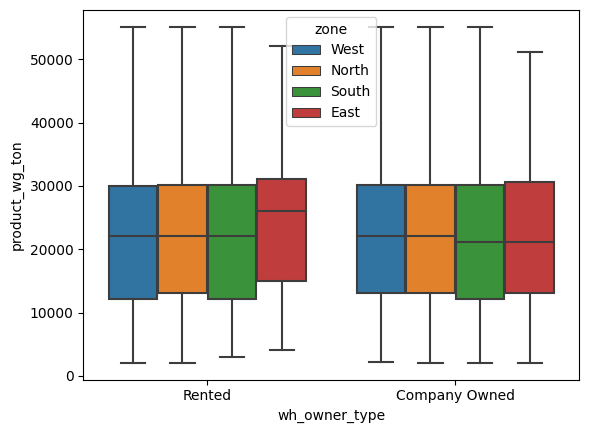

In [88]:
sns.boxplot(data = df, x='wh_owner_type',y='product_wg_ton', hue='zone')

In [89]:
df['WH_capacity_size'].replace(['Small','Mid','Large'],[1,2,3,],inplace=True)
df['wh_owner_type'].replace(['Rented','Company Owned'],[0,1],inplace=True)
df['approved_wh_govt_certificate'].replace(['A+','A','B+','B','C'],[5,4,3,2,1],inplace=True)

In [90]:
df=pd.get_dummies(df,drop_first=True)

In [91]:
df.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 1                 3.0                  1.0   
1                 3                 0.0                  0.0   
2                 2                 1.0                  0.0   
3                 2                 7.0                  2.5   
4                 3                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                2.0           4651.0              0             24.0   
1                4.0           6217.0              1             47.0   
2                4.0           4306.0              1             64.0   
3                2.0           6000.0              0             50.0   
4                2.0           4740.0              1             42.0   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0             0.0          0.0              1.0           91.0         29.0   
1             0.0          0.0              1.0          210.0         31.0   
2             0.0          0.0              0.0          161.0         37.0   
3             0.0          0.0              0.0          103.0         21.0   
4             0.0          0.0              1.0          112.0         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                        13.0            0.0   
1          NaN                         4.0            0.0   
2          NaN                        17.0            0.0   
3          NaN                        17.0            1.0   
4       2009.0                        18.0            0.0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             4               5.0            15.0   
1                             4               3.0            17.0   
2                             4               6.0            22.0   
3                             5               3.0            27.0   
4                             1               6.0            24.0   

   product_wg_ton  Location_type_Urban  zone_North  zone_South  zone_West  \
0         17115.0                    1           0           0          1   
1          5074.0                    0           1           0          0   
2         23137.0                    0           0           1          0   
3         22115.0                    0           1           0          0   
4         24071.0                    0           1           0          0   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        0   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  
0                        0                        1  
1                        1                        0  
2                        0                        0  
3                        0                        0  
4                        1                        0

In [92]:
df.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Location_type_Urban', 'zone_North', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6'],
      dtype='object')

In [93]:
df.describe(include="all").T

count          mean           std     min  \
WH_capacity_size              25000.0      2.214320      0.743834     1.0   
num_refill_req_l3m            25000.0      4.089040      2.606612     0.0   
transport_issue_l1y           25000.0      0.655900      0.918161     0.0   
Competitor_in_mkt             25000.0      3.099200      1.120772     0.0   
retail_shop_num               25000.0   4958.893200    969.402141  2532.5   
wh_owner_type                 25000.0      0.543120      0.498147     0.0   
distributor_num               25000.0     42.418120     16.064329    15.0   
flood_impacted                25000.0      0.000000      0.000000     0.0   
flood_proof                   25000.0      0.000000      0.000000     0.0   
electric_supply               25000.0      0.656880      0.474761     0.0   
dist_from_hub                 25000.0    163.537320     62.718609    55.0   
workers_num                   25000.0     28.736500      7.138484    10.5   
wh_est_year                   13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m    25000.0     17.130440      9.161108     0.0   
temp_reg_mach                 25000.0      0.303280      0.459684     0.0   
approved_wh_govt_certificate  25000.0      2.816920      1.428945     1.0   
wh_breakdown_l3m              25000.0      3.482040      1.690335     0.0   
govt_check_l3m                25000.0     18.812280      8.632382     1.0   
product_wg_ton                25000.0  22102.632920  11607.755077  2065.0   
Location_type_Urban           25000.0      0.081720      0.273943     0.0   
zone_North                    25000.0      0.411120      0.492047     0.0   
zone_South                    25000.0      0.254480      0.435577     0.0   
zone_West                     25000.0      0.317240      0.465411     0.0   
WH_regional_zone_Zone 2       25000.0      0.118520      0.323229     0.0   
WH_regional_zone_Zone 3       25000.0      0.115240      0.319318     0.0   
WH_regional_zone_Zone 4       25000.0      0.167040      0.373019     0.0   
WH_regional_zone_Zone 5       25000.0      0.183480      0.387067     0.0   
WH_regional_zone_Zone 6       25000.0      0.333560      0.471494     0.0   

                                  25%      50%      75%      max  
WH_capacity_size                  2.0      2.0      3.0      3.0  
num_refill_req_l3m                2.0      4.0      6.0      8.0  
transport_issue_l1y               0.0      0.0      1.0      2.5  
Competitor_in_mkt                 2.0      3.0      4.0      7.0  
retail_shop_num                4313.0   4859.0   5500.0   7280.5  
wh_owner_type                     0.0      1.0      1.0      1.0  
distributor_num                  29.0     42.0     56.0     70.0  
flood_impacted                    0.0      0.0      0.0      0.0  
flood_proof                       0.0      0.0      0.0      0.0  
electric_supply                   0.0      1.0      1.0      1.0  
dist_from_hub                   109.0    164.0    218.0    271.0  
workers_num                      24.0     28.0     33.0     46.5  
wh_est_year                    2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m       10.0     18.0     24.0     39.0  
temp_reg_mach                     0.0      0.0      1.0      1.0  
approved_wh_govt_certificate      1.0      3.0      4.0      5.0  
wh_breakdown_l3m                  2.0      3.0      5.0      6.0  
govt_check_l3m                   11.0     21.0     26.0     32.0  
product_wg_ton                13059.0  22101.0  30103.0  55151.0  
Location_type_Urban               0.0      0.0      0.0      1.0  
zone_North                        0.0      0.0      1.0      1.0  
zone_South                        0.0      0.0      1.0      1.0  
zone_West                         0.0      0.0      1.0      1.0  
WH_regional_zone_Zone 2           0.0      0.0      0.0      1.0  
WH_regional_zone_Zone 3           0.0      0.0      0.0      1.0  
WH_regional_zone_Zone 4           0.0      0.0      0.0 

## Train/Test Split (75:25)

In [94]:
from sklearn.model_selection import train_test_split

label_col = ['product_wg_ton']
new_df = df.drop(columns=['product_wg_ton','wh_est_year'],axis=1) #drop product_wg_ton and wh_est_year (missing 47% of the data)
X_train, X_test, y_train, y_test = train_test_split(new_df, df[label_col], test_size=0.25, random_state=123)

print(f'The training data shape {X_train.shape} and the train label shape {y_train.shape} \
\nThe test data shape {X_test.shape} and the test label shape {y_test.shape}') 

The training data shape (18750, 26) and the train label shape (18750, 1) 
The test data shape (6250, 26) and the test label shape (6250, 1)


## Setting up Linear Regression Model

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from scipy import stats

def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

def adjusted_r2(y_true,y_pred):
    Adj_r2 = 1 - (1-r2_score(y_true, y_pred)) * (len(y_true)-1)/(len(y_true)-X_train.shape[1])
    return Adj_r2

regression_model = LinearRegression()
regression_model.fit(X_train, y_train) 
predicted = regression_model.predict(X_train)
rmse_val = rmse(y_train, predicted)
print(f'The RMSE value for {regression_model} regression: {rmse_val:.2f}')

# Convert to numpy array and ensure double precision to avoid single precision errors
y_train = np.array(y_train, dtype=np.float64)
predicted = np.array(predicted, dtype=np.float64)

r2_score = r2_score(y_train, predicted)
print(f'The R-Sq value for the Regression model: {r2_score:.3f}')
      
#adj_r2_score = adjusted_r2(y_test,predicted)

Adj_r2 = 1 - (1-r2_score) * (len(y_train)-1)/(len(y_train)-X_train.shape[1])

print(f'The Adjusted R-Sq value for the Regression model: {Adj_r2:.3f}')

      

The RMSE value for LinearRegression() regression: 1735.65
The R-Sq value for the Regression model: 0.978
The Adjusted R-Sq value for the Regression model: 0.978


### Calculation p-values for model variables using the stats module from OLS model

In [96]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
display(est2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.407e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:53:55   Log-Likelihood:            -1.6646e+05
No. Observations:               18750   AIC:                         3.330e+05
Df Residuals:                   18725   BIC:                         3.332e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1214.5948    169.429      7.169      0.000     882.499    1546.690
WH_capacity_size               -38.5510     25.743     -1.498      0.134     -89.009      11.907
num_refill_req_l3m              -4.6505      5.066     -0.918      0.359     -14.580       5.279
transport_issue_l1y           -404.3711     13.985    -28.914      0.000    -431.784    -376.958
Competitor_in_mkt              -15.4252     12.742     -1.211      0.226     -40.400       9.550
retail_shop_num                 -0.0059      0.013     -0.439      0.661      -0.032       0.020
wh_owner_type                  -11.4002     26.321     -0.433      0.665     -62.992      40.192
distributor_num                  0.7455      0.790      0.943      0.345      -0.803       2.294
flood_impacted               -2.058e-13   3.18e-13     -0.647      0.518    -8.3e-13    4.18e-13
flood_proof                   1.426e-13   3.52e-14      4.057      0.000    7.37e-14    2.12e-13
electric_supply                -18.9270     28.987     -0.653      0.514     -75.743      37.889
dist_from_hub                    0.1321      0.202      0.653      0.514      -0.264       0.529
workers_num                     -0.5034      1.914     -0.263      0.793      -4.254       3.247
storage_issue_reported_l3m    1254.8397      1.543    813.345      0.000    1251.816    1257.864
temp_reg_mach                  867.2897     30.004     28.906      0.000     808.480     926.099
approved_wh_govt_certificate   116.4025      9.612     12.110      0.000      97.561     135.244
wh_breakdown_l3m              -230.1752      8.157    -28.219      0.000    -246.163    -214.187
govt_check_l3m                  -1.1641      1.702     -0.684      0.494      -4.500       2.172
Location_type_Urban           -115.7375     46.349     -2.497      0.013    -206.586     -24.889
zone_North                      73.6447    101.110      0.728      0.466    -124.540     271.829
zone_South                      27.0089    103.538      0.261      0.794    -175.935     229.953
zone_West                       61.7767     99.832      0.619      0.536    -133.903     257.456
WH_regional_zone_Zone 2         -9.3035     64.309     -0.145      0.885    -135.354     116.747
WH_regional_zone_Zone 3         -9.0675     63.030     -0.144      0.886    -132.612     114.477
WH_regional_zone_Zone 4         -2.6609     59.859     -0.044      0.965    -119.991     114.669
WH_regional_zone_Zone 5         14.4894     75.438      0.192      0.848    -133.377     162.355
WH_regional_zone_Zone 6        -16.7065     61.031     -0.274      0.784    -136.332     102.919
==============================================================================
Omnibus:                     5659.066   Durbin-Watson:                   1.997
Prob(Omnibus): 

In [97]:
p_values_df = pd.DataFrame(est2.pvalues)
p_values_df.reset_index(inplace=True)
p_values_df = p_values_df.rename(columns={'index':'Variables',0:'p_values'})
p_values_df


Variables       p_values
0                          const   7.849443e-13
1               WH_capacity_size   1.342671e-01
2             num_refill_req_l3m   3.586099e-01
3            transport_issue_l1y  7.051163e-180
4              Competitor_in_mkt   2.260581e-01
5                retail_shop_num   6.605619e-01
6                  wh_owner_type   6.649337e-01
7                distributor_num   3.454887e-01
8                 flood_impacted   5.178507e-01
9                    flood_proof   4.997307e-05
10               electric_supply   5.137923e-01
11                 dist_from_hub   5.135882e-01
12                   workers_num   7.925090e-01
13    storage_issue_reported_l3m   0.000000e+00
14                 temp_reg_mach  8.711383e-180
15  approved_wh_govt_certificate   1.253821e-33
16              wh_breakdown_l3m  1.331091e-171
17                govt_check_l3m   4.940395e-01
18           Location_type_Urban   1.253052e-02
19                    zone_North   4.664014e-01
20                    zone_South   7.942036e-01
21                     zone_West   5.360513e-01
22       WH_regional_zone_Zone 2   8.849731e-01
23       WH_regional_zone_Zone 3   8.856122e-01
24       WH_regional_zone_Zone 4   9.645440e-01
25       WH_regional_zone_Zone 5   8.476897e-01
26       WH_regional_zone_Zone 6   7.842881e-01

**Based on the calculated p-values for the different variables, it is found that there are multiple insignificant variables**. Those variables which has p-value greater than the threshold significance level i.e. 0.05 should be dropped from the data

In [98]:
# Dropping insignificant variables based on the p-values

variables_to_use = list(p_values_df[p_values_df['p_values']<=0.05].Variables[1:])

print('Below is the list significant variables to be used further:')
display(variables_to_use)

Below is the list significant variables to be used further:


['transport_issue_l1y',
 'flood_proof',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'wh_breakdown_l3m',
 'Location_type_Urban']

### Multicollinearity Check using Variance Inflation Factor (VIF)
- Multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that have VIF score above 5. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [100]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [101]:
# apply VIF computation to all columns
features = new_df[variables_to_use].columns.to_list()
vif_data = compute_vif(features)
vif_data

feature       VIF
0           Location_type_Urban  1.096010
1           transport_issue_l1y  1.439703
2                 temp_reg_mach  1.569373
3  approved_wh_govt_certificate  4.524620
4    storage_issue_reported_l3m  4.934921
5              wh_breakdown_l3m  5.211898
6                   flood_proof       NaN

In [102]:
# drop with highest vif score until all vif scores are under 5
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 5]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove flood_proof
I will remove wh_breakdown_l3m


feature       VIF
0           Location_type_Urban  1.094946
1           transport_issue_l1y  1.376121
2                 temp_reg_mach  1.569005
3    storage_issue_reported_l3m  3.313188
4  approved_wh_govt_certificate  4.037532

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt

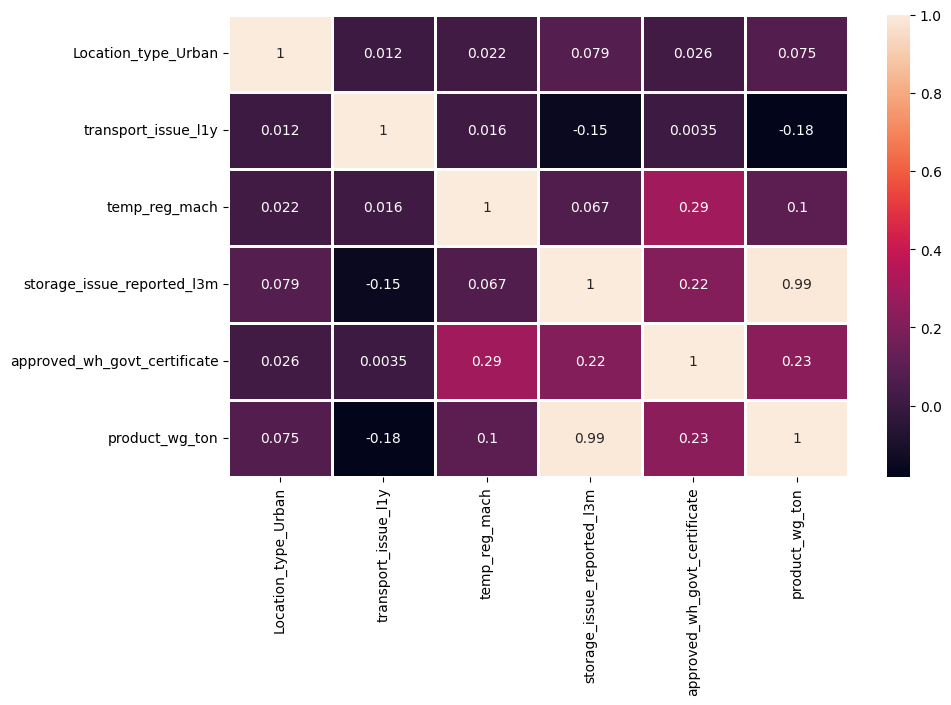

In [104]:
# correlation matrix of multicollinearity free dataset
label_col = ['product_wg_ton']
plt.figure(figsize=(10, 6)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

## Setting up Classical Regression Machine Learning Models
* I will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error.

#### Iteration 1 -> train - test split (75% - 25%)

In [105]:
# train test split (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(new_df[selected_features], df[label_col], test_size=0.25, random_state=123)

print(f'The training data shape {X_train.shape} and the train label shape {y_train.shape} \
\nThe test data shape {X_test.shape} and the test label shape {y_test.shape}') 

X_train.head(3)

The training data shape (18750, 5) and the train label shape (18750, 1) 
The test data shape (6250, 5) and the test label shape (6250, 1)


Location_type_Urban  transport_issue_l1y  temp_reg_mach  \
6104                     0                  1.0            1.0   
6567                     0                  1.0            0.0   
16517                    1                  2.5            1.0   

       storage_issue_reported_l3m  approved_wh_govt_certificate  
6104                          7.0                             4  
6567                         18.0                             4  
16517                        31.0                             5

The RMSE value for Linear regression: 1834.58 and MAPE: 0.0937 
The RMSE value for Ridge regression: 1834.58 and MAPE: 0.0937 
The RMSE value for Lasso regression: 1834.53 and MAPE: 0.0937 
The RMSE value for Elastic regression: 1858.94 and MAPE: 0.0928 
The RMSE value for MLP regression: 1113.85 and MAPE: 0.0523 
The RMSE value for DecisionTree regression: 976.26 and MAPE: 0.0475 
The RMSE value for RandomForest regression: 971.03 and MAPE: 0.0474 
The RMSE value for GradientBoosting regression: 961.22 and MAPE: 0.0476 


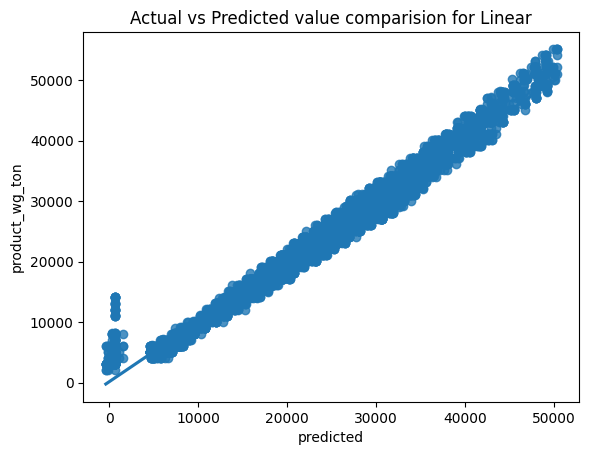

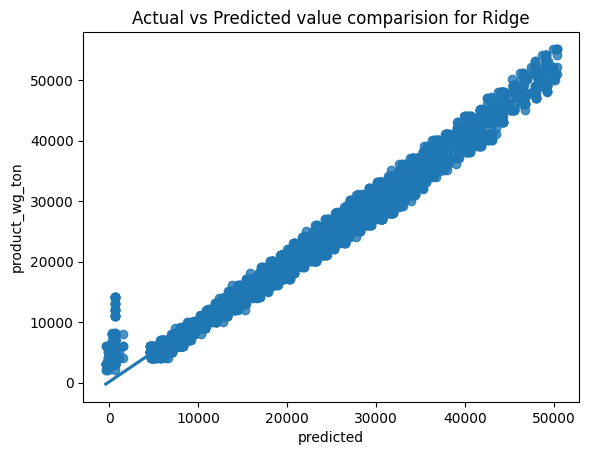

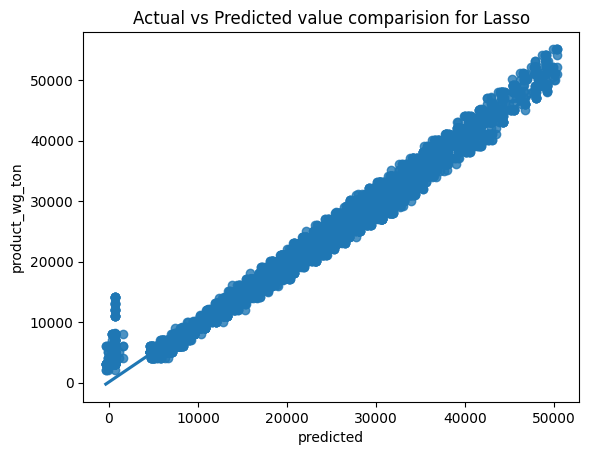

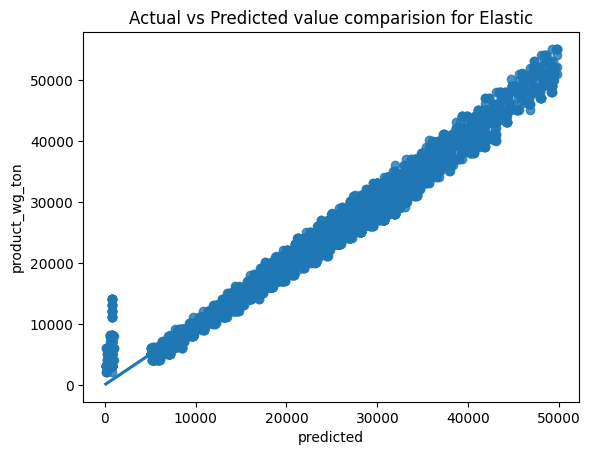

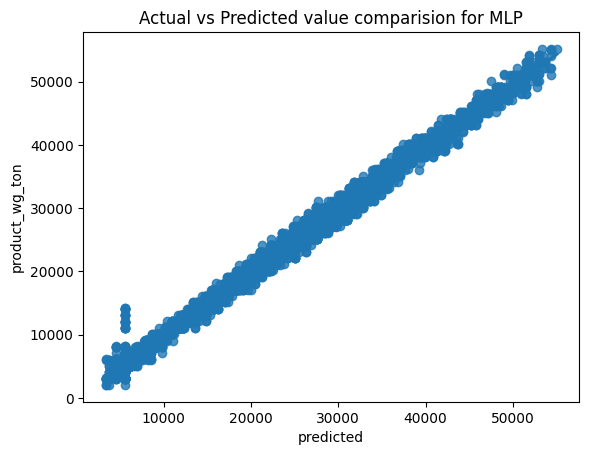

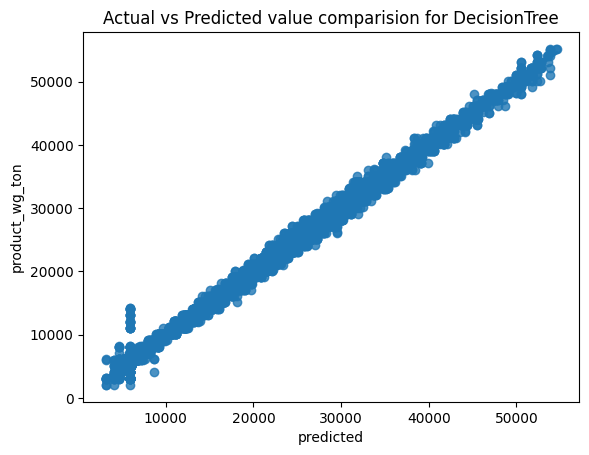

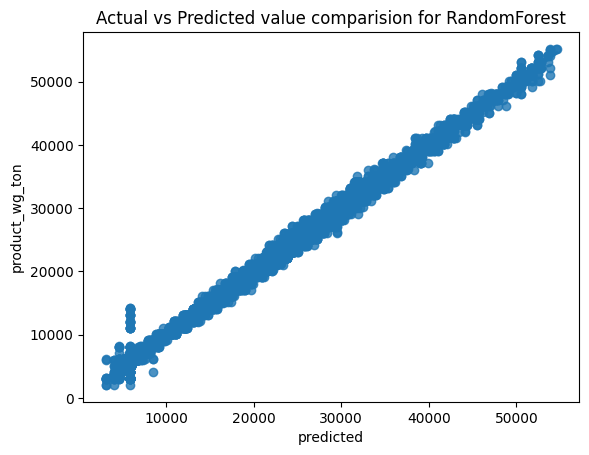

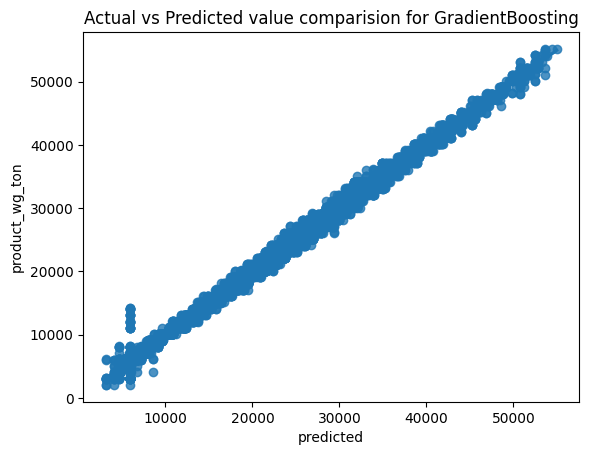

In [106]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)


def regression(regressor_name, regressor, X_train, X_test, y_train, y_test):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    mape_val = mape(y_test, predicted)
    print(f'The RMSE value for {regressor_name} regression: {rmse_val:.2f} and MAPE: {mape_val:.4f} ')
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(f'Actual vs Predicted value comparision for {regressor_name}')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'Ridge' : Ridge(alpha = 1),
    'Lasso' : Lasso(alpha = 1),
    'Elastic' : ElasticNet(alpha = 1),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key], X_train, X_test, y_train, y_test)

In [107]:
pred_df

Actual   Linear_Pred    Ridge_Pred    Lasso_Pred  Elastic_Pred  \
20000  13067.0    726.654157    726.670756    726.569157    811.481439   
5515   28148.0  29512.048836  29512.115556  29511.546010  29597.828353   
966    32063.0  31991.083701  31991.149385  31990.566735  32068.267496   
22726  49130.0  45625.775461  45625.835447  45625.180725  45655.682780   
2690   27147.0  28987.026569  28987.100357  28987.740343  29198.931903   
...        ...           ...           ...           ...           ...   
1898   17095.0  17831.369674  17831.448125  17832.147078  18081.955761   
824     5108.0    726.654157    726.670756    726.569157    811.481439   
16303  27130.0  28088.202253  28088.228133  28087.876640  28111.744266   
24929  28075.0  29192.191710  29192.319511  29205.256010  29332.996857   
18116  22151.0  21890.615089  21890.643560  21890.324827  21935.646409   

           MLP_Pred  DecisionTree_Pred  RandomForest_Pred  \
20000   5628.116581        5939.781321        5945.624579   
5515   29952.892104       30268.366667       30276.578961   
966    32523.784626       32126.080460       32112.724275   
22726  48247.737333       48999.809524       48995.233498   
2690   28042.223374       27477.687500       27474.801729   
...             ...                ...                ...   
1898   16686.750217       16641.083333       16637.913884   
824     5628.116581        5939.781321        5945.624579   
16303  26729.178649       26680.230769       26690.275340   
24929  28098.901313       28113.666667       28141.310413   
18116  20585.477062       20901.603448       20912.390819   

       GradientBoosting_Pred  
20000            5937.173981  
5515            30392.503821  
966             32119.658415  
22726           48790.805603  
2690            27452.284768  
...                      ...  
1898            16568.819984  
824              5937.173981  
16303           26669.631137  
24929           27954.421315  
18116           20932.102865  

[6250 rows x 9 columns]

#### Iteration 2 -> train - test split (80% - 20%)

In [108]:
# train test split (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(new_df[selected_features], df[label_col], test_size=0.20, random_state=123)

print(f'The training data shape {X_train.shape} and the train label shape {y_train.shape} \
\nThe test data shape {X_test.shape} and the test label shape {y_test.shape}') 

X_train.head(3)

The training data shape (20000, 5) and the train label shape (20000, 1) 
The test data shape (5000, 5) and the test label shape (5000, 1)


Location_type_Urban  transport_issue_l1y  temp_reg_mach  \
9064                     0                  0.0            0.0   
6051                     0                  0.0            0.0   
17848                    0                  1.0            0.0   

       storage_issue_reported_l3m  approved_wh_govt_certificate  
9064                          9.0                             1  
6051                         24.0                             2  
17848                        14.0                             3

The RMSE value for Linear regression: 1835.39 and MAPE: 0.0940 
The RMSE value for Ridge regression: 1835.39 and MAPE: 0.0940 
The RMSE value for Lasso regression: 1835.34 and MAPE: 0.0940 
The RMSE value for Elastic regression: 1857.17 and MAPE: 0.0931 
The RMSE value for MLP regression: 1083.55 and MAPE: 0.0521 
The RMSE value for DecisionTree regression: 979.80 and MAPE: 0.0479 
The RMSE value for RandomForest regression: 974.73 and MAPE: 0.0478 
The RMSE value for GradientBoosting regression: 967.76 and MAPE: 0.0481 


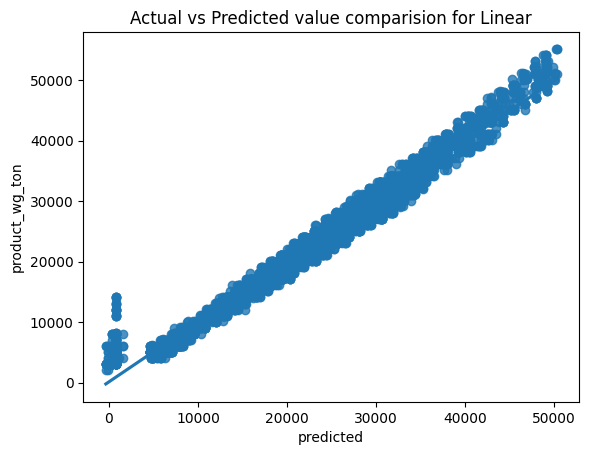

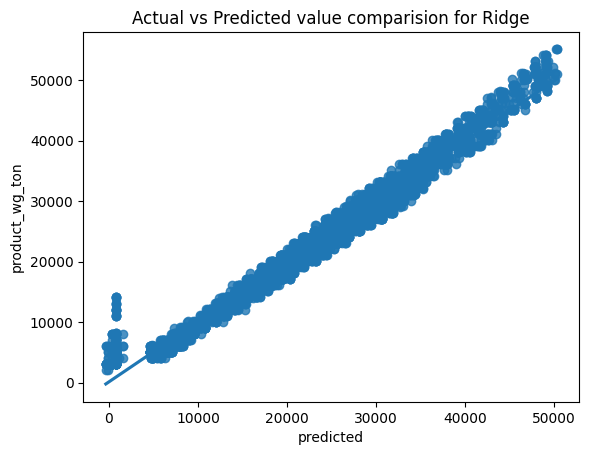

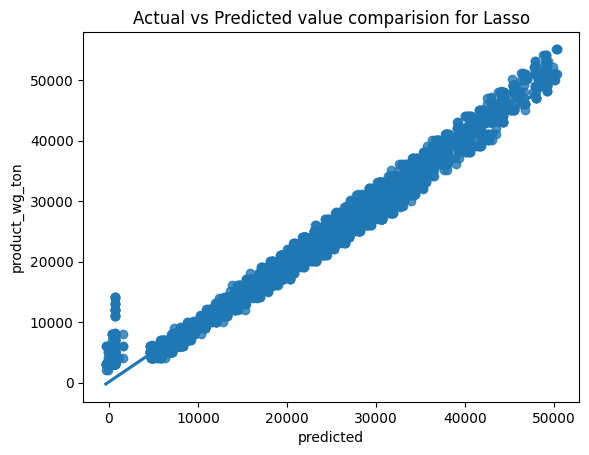

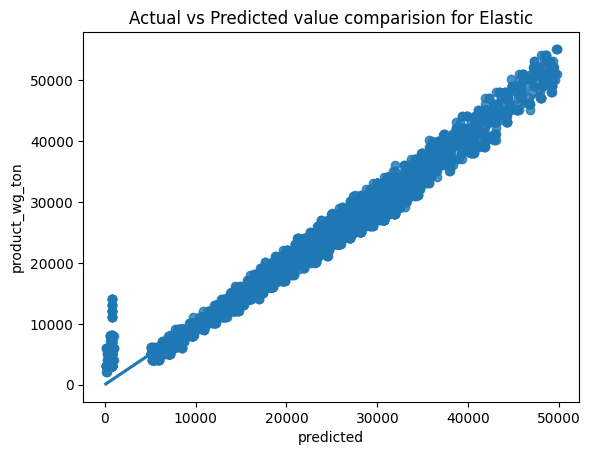

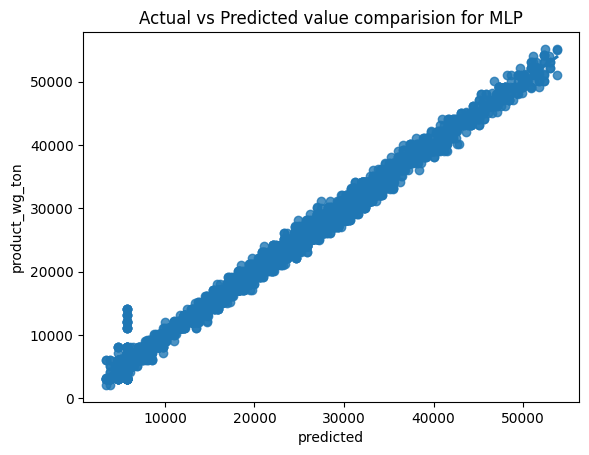

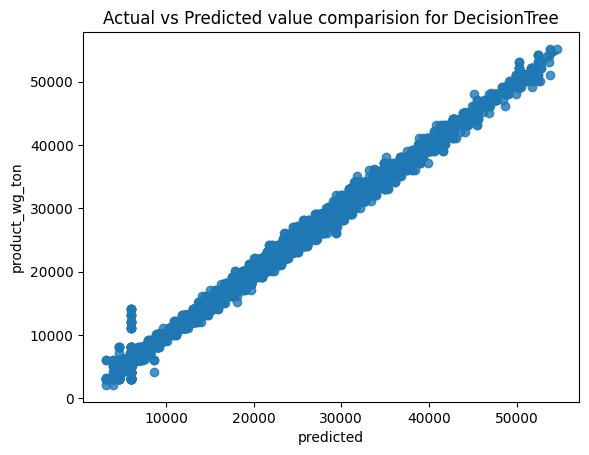

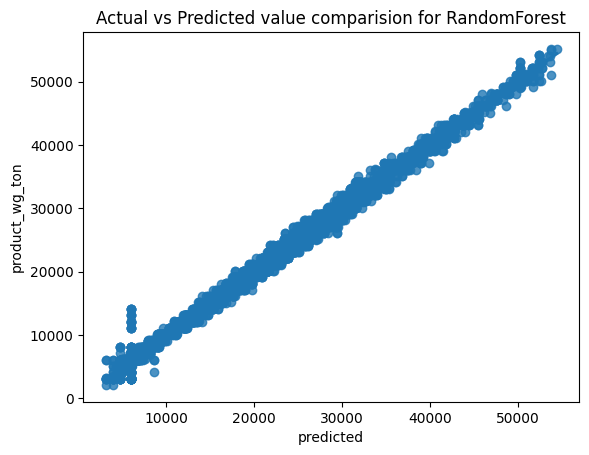

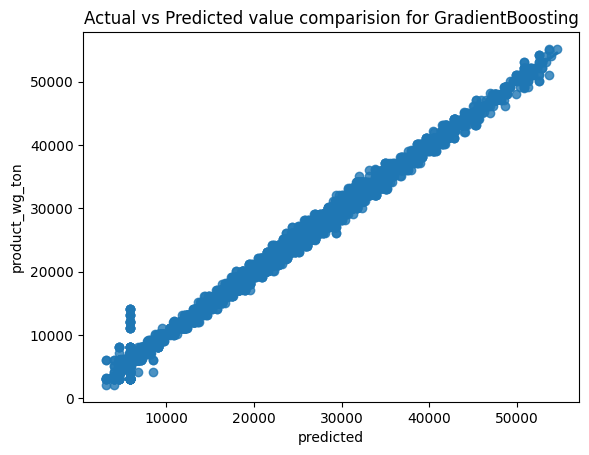

In [109]:
pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key], X_train, X_test, y_train, y_test)

In [110]:
pred_df

Actual   Linear_Pred    Ridge_Pred    Lasso_Pred  Elastic_Pred  \
20000  13067.0    738.541796    738.557567    738.453321    822.205380   
5515   28148.0  29508.365672  29508.429769  29507.841069  29598.156288   
966    32063.0  31987.229804  31987.292995  31986.689921  32068.599828   
22726  49130.0  45620.982528  45621.040739  45620.358608  45656.039296   
2690   27147.0  28986.637029  28986.707976  28987.346782  29202.496294   
...        ...           ...           ...           ...           ...   
17399  19149.0  19417.651571  19417.680131  19417.361695  19472.481995   
6965   30093.0  27029.501540  27029.566543  27028.992217  27127.712749   
20230  32151.0  32074.858591  32074.941362  32074.231904  32190.549895   
19078  11122.0  12068.687963  12068.738819  12068.357121  12183.101443   
1073   28088.0  27183.683966  27183.814591  27186.035883  27678.659701   

           MLP_Pred  DecisionTree_Pred  RandomForest_Pred  \
20000   5729.764460        5969.447761        5968.455536   
5515   29484.159860       30298.508197       30307.168285   
966    31987.033910       32102.736842       32090.481226   
22726  47261.713989       48999.809524       48992.756955   
2690   27625.532595       27514.411765       27542.157192   
...             ...                ...                ...   
17399  18167.846042       18438.808511       18445.005612   
6965   26997.510983       28656.387755       28644.437564   
20230  33597.582031       31779.181818       31778.681857   
19078  11023.007108       11145.021739       11149.137588   
1073   27048.627350       28284.833333       28286.882452   

       GradientBoosting_Pred  
20000            5937.173981  
5515            30392.503821  
966             32119.658415  
22726           48790.805603  
2690            27452.284768  
...                      ...  
17399           18275.321800  
6965            28526.992361  
20230           31868.551996  
19078           10892.132450  
1073            27929.073408  

[5000 rows x 9 columns]